#### 모듈

In [168]:
# file
import os
import os.path as path

# data
import pandas as pd
import numpy as np
import math
from datetime import datetime as dt

# encoder
from sklearn.preprocessing import LabelEncoder

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# magic functions
from IPython.core.magic import register_cell_magic

#### 매직 함수 (편의성 함수)

In [3]:
@register_cell_magic
def skip(line, cell):
    return

#### 인코더 불러오기

In [4]:
# path
BasePath = "./encoders"

# get list of encoder files
encoder_file_list = os.listdir(BasePath)

# print list of encoder files
print(encoder_file_list)

# load encoder files
encoder_dict = {}

for file in encoder_file_list:
    encoder_name = file.replace(".npy", "")
    encoder_dict[encoder_name] = LabelEncoder()
    classes = np.load(path.join(BasePath, file), allow_pickle=True)
    encoder_dict[encoder_name].classes_ = np.load(path.join(BasePath, file), allow_pickle=True)
    
    if encoder_name == "os_version":
        encoder_dict[encoder_name].fit(list(map(lambda x: str(x), classes)))

# encoder modify
for encoder_name in encoder_dict.keys():
    # reorder encoder : make encoder[0] = nan
    encoder_dict[encoder_name].classes_ = \
        np.append(encoder_dict[encoder_name].classes_[-1],\
                    encoder_dict[encoder_name].classes_[:-1])

    print(f"\n{encoder_name} : {(encoder_dict[encoder_name].classes_.shape[0]) - 1} 가지\n{encoder_dict[encoder_name].classes_[1:6]}")

# reorder 'event_type' encoder classes
data_set_names = [
    'error',
    'enter.main_page',
    'enter.signup_page',
    'complete.signup',
    'enter.content_page',
    'click.content_page_start_content_button',
    'click.content_page_more_review_button',
    'enter.payment_page',
    'complete.subscription',
    'renew.subscription',
    'resubscribe.subscription',
    'start.free_trial',
    'start.content',
    'enter.lesson_page',
    'complete.lesson',
    'click.lesson_page_related_question_box',
    'end.content',
    'click.cancel_plan_button'
]

encoder_dict['event_type'].classes_ = np.array(data_set_names)


['button.name.npy', 'button_name.npy', 'city.npy', 'content.difficulty.npy', 'content.id.npy', 'country.npy', 'coupon.discount_amount.npy', 'device_family.npy', 'device_type.npy', 'event_type.npy', 'is_free_trial.npy', 'is_trial.npy', 'language.npy', 'lesson.id.npy', 'os_name.npy', 'os_version.npy', 'paid_amount.npy', 'pg.type.npy', 'plan.price.npy', 'plan.type.npy', 'platform.npy', 'question.id.npy', 'trial.type.npy', 'type.npy', 'user_id.npy']

button.name : 9 가지
['구독 시작하기' '무료로 들어보기' '무료로 시작하기' '최저가 혜택 받기' '최저가로 시작하기']

button_name : 5 가지
['무료로 시작하기' '수강시작' '수강하기' '이어하기' None]

city : 4340 가지
["'Ewa Beach" '6th of October City' 'A Coruña' 'A Me' 'AElmhult']

content.difficulty : 5 가지
['advanced' 'beginner' 'hard' 'intermediate' None]

content.id : 212 가지
['011a040b817225cb7c01d4676c21ea44' '01d9424fd9d2b1d7a4392042fc646061'
 '035f018008f1696ded6e10e1dd757726' '03b4a290c08f7fa83933827a994f2e61'
 '040ccaa97a52e006a2c94bb7c5dce263']

country : 189 가지
['Afghanistan' 'Albania' 'Algeria' 

#### 인코더 테스트  << skipping >>

In [5]:
%%skip  # << skipping >>

## 주의사항
# 1. BaseFilePath에 데이터 파일 경로를 설정해주세요.
# 2. 제외하고 싶은 컬럼이 있으면 exclude_columns에 추가해주세요.
# 3. 인코딩을 하고 컬럼 이름을 바꿔 주세요.

## 함수 설명
# .transform()을 이용해서 데이터를 변환해주세요.
# .inverse_transform()을 이용해서 데이터를 역변환해주세요.


## 인코딩

# 개인적으로 BaseFilePath를 설정해주었는데, 이를 이용해서 파일 리스트를 불러오는 코드입니다.
BaseFilePath = 'd:\Codeit\intermediate_project\주제 2. 구독서비스 프로덕트 데이터 분석'
filelist = os.listdir(BaseFilePath)[:-1]

# 제외 컬럼
exclude_columns = ['device_carrier', 'os_version']

# 제외 컬럼 : 제외하고 싶은 컬럼을 추가합니다.
exclude_columns_plus = []


# display file list
print(filelist)

# load data
dfs = []

for file in filelist:
    if file.endswith('.csv'):
        df = pd.read_csv(path.join(BaseFilePath, file), nrows=1000)
        
        # preprocess
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # drop 
        df = df.drop('device_carrier', axis=1)
        df = df.drop('os_version', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        
        dfs.append(df)
        print(f"file: {file}, shape: {df.shape}")

for i, df in enumerate(dfs):
    print(f"file: {filelist[i]} encodings - ")
    
    # encode categorical columns using the loaded encoders
    for col in df.columns:
        # exception handling
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # encode using the loaded encoder
        df[col] = encoder_dict[col].transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # display result head
    display(df.head())

In [6]:
%%skip  # << skipping >>

## 디코딩

for i, df in enumerate(dfs):
    print(f"file: {filelist[i]} decodings - ")
    
    # encode categorical columns using the loaded encoders
    for col in df.columns:
        # exception handling
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # encode using the loaded encoder
        df[col] = encoder_dict[col].inverse_transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # display result head
    display(df.head())

#### 함수 정의

In [7]:
def read_sample(path, samplesize=4000000):
    '''
    #### 데이터를 불러오되 일정 크기 이상이면 샘플로 추출하여 크기를 줄입니다. \n
     \n
    path : 파일 경로입니다. \n
    samplesize : 추출할 샘플의 크기입니다.(default: 4000000), 0 이라면 하지 않습니다. \n
     \n
    return : 데이터프레임을 반환합니다. \n
     \n
    chunksize(=2000000)로 불러와서 samplesize를 넘으면 샘플링하고 중복을 제거합니다. \n
    '''
    
    # set df
    df = []
    
    # read
    temp = pd.read_csv(path, chunksize=2000000)
    
    # append and union
    for chunk in temp:
        df.append(chunk)
    
    # check df length
    if len(df) == 1:
        df = df[0]
    else:
        df = pd.concat(df, ignore_index=True)
    
    # sample and drop duplicates
    if (samplesize != 0) and (df.shape[0] > samplesize):
        df = df.sample(samplesize, replace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True) 
        
    return df

#### 파일 탐색  << skipping >>

In [8]:
%%skip  # << skipping >>

BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# filter filename
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

#### 로드 데이터  << skipping >>

In [9]:
%%skip  # << skipping >>

# set
DF = []
dfs = []
common_cols = []
all_cols = []
core_cols = ['user_id', 'event_type', 'client_event_time']

# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        df = read_sample(path.join(BaseFilePath, dirname, filename))

        # if common columns are not set, set it            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # if common columns are set, check common columns
        common_cols = list(set(common_cols).intersection(set(df.columns)))
        all_cols = list(set(all_cols).union(set(df.columns)))

        ## preprocessing
        # drop device_carrier
        df = df.drop('device_carrier', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # # before update, fillna with '0'
        # df.fillna({'country' : '0', 'city' : '0', 'device_type' : '0', 'device_family' : '0'}, inplace=True)
        
        # update
        dfs.append(df)

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)

print(common_cols)

#### 데이터 통합  << skipping >>

In [10]:
%%skip  # << skipping >>

# reset DF
if len(DF) > 0:
    DF = []

# concat dfs
DF = pd.concat(dfs[:9] + dfs[10:], axis=0).reset_index(drop=True)
print(DF.shape[0])

## preprocessing
# drop os_version
DF = DF.drop('os_version', axis=1)

# encode categorical columns using the loaded encoders
for col in DF.columns:
    # exception handling
    if col in ['client_event_time', 'device_carrier']:
        continue
    
    print(f"\n\n{col}")
    
    # encode using the loaded encoder
    DF[col] = encoder_dict[col].transform(DF[col])
    
    # display
    display(DF[col].value_counts())

# display result head   
DF

In [11]:
%%skip  # << skipping >>

com_DF = DF[core_cols].copy() # copy core_cols

print(com_DF.info())
DF.info()

In [12]:
%%skip  # << skipping >>

big_df = pd.read_csv(path.join(BaseFilePath, dirname, filelist[9]), chunksize=2000000)
enc_chunks = []

for i, chunk in enumerate(big_df):
    # preprocessing
    chunk = chunk.drop('device_carrier', axis=1)
    chunk = chunk.drop('os_version', axis=1)
    chunk['client_event_time'] = pd.to_datetime(chunk['client_event_time'])
    
    # display
    print(f"\n\n{i}")
    print(chunk.info())
    
    # encoding
    for col in chunk.columns:
        # exception handling
        if col in ['client_event_time', 'device_carrier']:
            continue
        
        # label encoding
        chunk[col] = encoder_dict[col].transform(chunk[col])
        
    enc_chunks.append(chunk)
    
big_df = pd.concat(enc_chunks, axis=0)

In [13]:
%%skip  # << skipping >>

print(big_df.info())
big_df.head()

#### 인코딩 데이터 저장  << skipping >>

In [14]:
%%skip  # << skipping >>

# save the big_df
big_df.to_csv('total_lesson.csv', index=False)
print('done - save total_lesson.csv')

# save the DF
DF.to_csv('total.csv', index=False)
print('done - save total.csv')

#### ======== 본 EDA ========

#### 변수 선언

In [15]:
core_col = ['client_event_time', 'user_id', 'event_type']

#### 함수 정의

In [16]:
def check_too_close_log(df, offset = 1):
    '''
    #### offset 이내의 로그들을 출력하고 로그의 인덱스를 반환합니다. \n
     \n
    df : 분석할 데이터입니다. \n
    offset : 근접 로그의 측정하는 기준입니다. 단위는 초입니다. 이 값 이하의 시간차이를 가진 로그를 근접로그라고 합니다. \n
     \n
    return : 근접로그의 인덱스. \n
    '''

    ## error handling
    
    # check 'user_id' column
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    
    # check 'client_event_time' column
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    
    # if 'client_event_time' is str, convert to datetime
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])


    ## main

    # drop duplicate
    temp = df.drop_duplicates().copy()
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    # 'user_id' - max conut
    temp = df.groupby('user_id')['user_id'].count().sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp} \\")

    # over 1
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # 'user_id', 'client_event_time' - max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
        .count()\
        .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        print(f"('user_id', 'client_event_time') duplicated_cnt : {mask.sum()}")
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    # too_close_log check
    temp = df.sort_values(['user_id', 'client_event_time'])\
            .groupby(['user_id'])['client_event_time']\
            .diff().dt.total_seconds()
    temp = temp.dropna()
    
    # display
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # display too close log
    if (temp < offset).sum() > (temp == 0).sum():
        # count
        cnt = (temp < offset).sum() - (temp == 0).sum()
        # too close log rate
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        # display sample
        result = temp[((temp < offset) & (~(temp == 0)))]
        display(result)
        
    
    return result.index

In [17]:
def concat_enc_df_int32(df1, df2):
    
    # make common columns in both dfs
    for col in df1:
        if col in df2.columns:
            continue    
        df2.loc[:, col] = 0

    for col in df2:
        if col in df1.columns:
            continue
        df1.loc[:, col] = 0

    # concat
    result = pd.concat([df1, df2], axis=0)\
                .sort_values('client_event_time')\
                .reset_index(drop=True)

    # set convert dict
    convert_dict = {col : 'int16' for col in result.columns}
    convert_dict['client_event_time'] = 'datetime64[ns]'
    convert_dict['user_id'] = 'int32'

    # convert
    result = result.astype(convert_dict)
    
    return result

In [18]:
def get_combinations(li):
    # exception handling
    if len(li) == 0:
        return []
    if len(li) == 1:
        return li
    if len(li) == 2:
        if len(set(li)) == 1:
            return [li[0]]
        return sorted(li)
    
    # set variables
    combinations = []
    act = li[0]
    only_act = 0
    
    # get combinations
    for i in li[1:]:
        next_act = i
        
        if next_act == act:
            only_act = act
            continue
        
        item = sorted([act, next_act])
        if item not in combinations:
            combinations.append(item)
            combinations = sorted(combinations)
        
        act = next_act
    
    # exception handling
    if len(combinations) == 1:
        return combinations[0]

    if len(combinations) == 0:
        return [only_act]
    
    return combinations

In [19]:
def get_set(li):
    if len(li) == 0:
        return set()
    if len(li) == 1:
        return set([int(li[0])])
    if len(li) == 2:
        if len(set(li)) == 1:
            return set([int(li[0])])
        return set([int(li[0]), int(li[1])])
    
    combinations = set()
    act = int(li[0])
    
    # get combinations
    for i in li[1:]:
        next_act = int(i)
        
        combinations.add(act)
        
        act = next_act
    
    return combinations

In [20]:
def display_cnt_rate(cnt):
    # additional information
    rate = cnt / cnt.sum() * 100
    rate_cum = rate.cumsum()

    # display
    print(f'sample_cnt : {cnt.sum()}')
    result = pd.concat([cnt, rate, rate_cum], axis = 1)
    result.columns = ['cnt', 'rate', 'rate_cum']
    display(result.head(30).round(2))
    
    return result

In [21]:
## 이벤트 타입을 사용자 정의 함수로 agg하고 결과를 보여주는 함수
def event_type_agg(df, func):
    # apply user defined function to aggregate event_type
    result = df\
        .sort_values(['user_id', 'client_event_time'])\
        .groupby(['user_id'])['event_type']\
        .agg(lambda x: func(x.values))\
        .value_counts()
        
    # display
    display_cnt_rate(result)

In [22]:
def valcnt_with_daterange(df, cols):
    if 'client_event_time' not in cols:
        cols.append('client_event_time')
        print("cautious: client_event_time is not in cols, added to cols")
    
    target_df = df[cols]
    target_cols = [col for col in cols if col != 'client_event_time']

    for col in target_df.columns:
        if col == 'client_event_time':
            continue
        
        temp_le = encoder_dict[col]
        temp_le.classes_[0] = 'NaN'
        
        target_df[col] = encoder_dict[col].inverse_transform(target_df[col])

    result = target_df[target_cols].value_counts()
    temp = target_df.groupby(target_cols)['client_event_time']
    result = pd.concat([result, temp.min().dt.date, temp.max().dt.date], axis=1)

    result.columns = ['count', 'min_date', 'max_date']
    result['dateRange'] = (result['max_date'] - result['min_date'])

    display(result)

In [23]:
def get_rate_in_columns(df, col="", head_len = 10, df_name = ""):
    if col == "":
        result = df.value_counts()
    else:
        result = df[col].value_counts()

    rate = result / result.sum() * 100
    rate_cum = rate.cumsum()

    # get result
    result = pd.concat([result, rate, rate_cum], axis = 1)
    result.index = encoder_dict[col].inverse_transform(result.index)
    
    # set column name
    result.columns = ['count', 'rate', 'rate_cumsum']
    
    if df_name == "":
        df_name = col
    
    # display
    print(f"{df_name} result : ")
    display(result.head(head_len).index)
    display(result.head(head_len))

In [24]:
def display_two_sets_relation(set_A, set_B):
    print(f"set_A : {len(set_A)}")
    print(f"set_B : {len(set_B)}")
    
    print(f"set_B in set_A : {len(set_B.intersection(set_A))}")
    print(f"set_B not in set_A : {len(set_B - set_A)}")
    print(f"set_A not in set_B : {len(set_A - set_B)}")

In [25]:
def get_user_rate(df, base_mask, condition_mask):
    base_user = df.loc[base_mask, 'user_id'].unique()
    condition_user = df.loc[(condition_mask), 'user_id'].unique()
    
    base_user = set(base_user)
    condition_user = set(condition_user)
    
    # exception handling
    if len(base_user) == 0 \
    or len(base_user) == 1:
        print("base_user is empty or has only one element")
        return list(), list()
    
    if len(condition_user) == 0 \
    or len(condition_user) == 1:
        print("condition_user is empty or has only one element")
        return list(), list()
    
    # display the condition
    display_two_sets_relation(base_user, condition_user)
    print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")
    
    return list(base_user), list(condition_user)

In [26]:
def groupby_user_agg_muli_column(df, aggfunc, additional_cols = []):
    # error handling
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    if 'event_type' not in df.columns:
        print("'event_type' column not found")
        return
    
    # additional columns error handling
    for col in additional_cols:
        if col not in df.columns:
            print(f"'{col}' column not found")
            return
    
    # sorting
    df = df.sort_values(['user_id', 'client_event_time'], ascending=True)
    
    # filtering
    temp_df = df[['user_id', 'client_event_time', 'event_type'] + additional_cols].copy()
    
    # make total column
    temp_df['total'] = temp_df['client_event_time']
    temp_df['total'] = temp_df['total'].astype(str)
    for col in temp_df.columns[2:]:
        temp_df['total'] = temp_df['total'] + ' ' + temp_df[col].astype(str)

    # groupby user_id
    result = temp_df.groupby('user_id')['total']\
        .aggregate(lambda x: aggfunc([ item.split() for item in str(x).split('\n')[:-1] ]))
    
    # 
    return result

#### 옵션 설정

In [27]:
pd.set_option('mode.chained_assignment', None)

#### 인코딩 데이터 불러오기

In [28]:
big_df = pd.read_csv('total_lesson.csv')
print('done - load total_lesson.csv')

DF = pd.read_csv('total.csv')
print('done - load total.csv')

done - load total_lesson.csv
done - load total.csv


#### 칼럼 변환

In [29]:
# set time columns
time_cols = ['client_event_time']

# set convert dict
convert_dict1 = {col : 'int16' for col in big_df.columns}
convert_dict1['client_event_time'] = 'datetime64[ns]'
convert_dict1['user_id'] = 'int32'

convert_dict2 = {col : 'int16' for col in DF.columns}
convert_dict2['client_event_time'] = 'datetime64[ns]'
convert_dict2['user_id'] = 'int32'

# convert
big_df = big_df.astype(convert_dict1)
DF = DF.astype(convert_dict2)

# display
display(big_df.info())
display(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int16         
 1   client_event_time  datetime64[ns]
 2   country            int16         
 3   device_family      int16         
 4   device_type        int16         
 5   event_type         int16         
 6   language           int16         
 7   os_name            int16         
 8   platform           int16         
 9   user_id            int32         
 10  content.id         int16         
 11  is_trial           int16         
 12  lesson.id          int16         
 13  is_free_trial      int16         
dtypes: datetime64[ns](1), int16(12), int32(1)
memory usage: 722.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330946 entries, 0 to 12330945
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

#### 데이터 분할

In [30]:
# separate 2022 / 2023
enter_lesson_2022 = big_df[big_df['client_event_time'].dt.year == 2022]
print(enter_lesson_2022.shape[0])
enter_lesson_2023 = big_df[big_df['client_event_time'].dt.year == 2023]
print(enter_lesson_2023.shape[0])

DF_2022 = DF[DF['client_event_time'].dt.year == 2022]
print(DF_2022.shape[0])
DF_2023 = DF[DF['client_event_time'].dt.year == 2023]
print(DF_2023.shape[0])

7373559
13655574
5978077
6352482


#### 각 연도 묶음

In [31]:
df_2022 = concat_enc_df_int32(DF_2022, enter_lesson_2022)
display(df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13351636 entries, 0 to 13351635
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [32]:
df_2023 = concat_enc_df_int32(DF_2023, enter_lesson_2023)
display(df_2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008056 entries, 0 to 20008055
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [33]:
big_df = []
DF = []

In [34]:
MIN_DATE = df_2022['client_event_time'].min()
MAX_DATE = df_2023['client_event_time'].max()

print(f'MIN_DATE : {MIN_DATE}')
print(f'MAX_DATE : {MAX_DATE}')

MIN_DATE : 2022-01-01 00:00:01.181000
MAX_DATE : 2023-12-31 23:59:35.209000


In [35]:
def get_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    # get pay duration
    for event in event_list:
        # start
        if (start == 0) and event[3] in ['8', '9', '10']:
            start = pd.to_datetime(event[1] + ' ' + event[2])
            end == 0
        # end
        if (end == 0) and (event[3] == '17'):
            end = pd.to_datetime(event[1] + ' ' + event[2])

        # sum duration        
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0
    
    # exception handling
    if sum == pd.Timedelta(0) and end != 0:
        return (end - MIN_DATE)
    if sum == pd.Timedelta(0) and start != 0:
        return (MAX_DATE - start)

    # 
    return sum

In [36]:
def get_non_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    before_price = 0
    price = 0
    
    # get non pay duration
    for event in event_list:
        # start
        if (end == 0) and event[3] in ['8', '9', '10']:
            end = pd.to_datetime(event[1] + ' ' + event[2])
            # update price
            before_price = price
            price = event[4]
        # end
        if (start == 0) and (event[3] == '17'):
            start = pd.to_datetime(event[1] + ' ' + event[2])
            # reset end
            end = 0
        
        # sum duration  
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0

    return [sum, price, before_price]

### 분석

#### too close log

In [37]:
# target data
com_df_22 = df_2022[core_col]
com_df_23 = df_2023[core_col]
display(com_df_22)
display(com_df_23)


client_event_time  user_id  event_type
0        2022-01-01 00:00:01.181    50675          14
1        2022-01-01 00:00:10.862        0           4
2        2022-01-01 00:01:16.636        0           2
3        2022-01-01 00:01:34.047    14684          13
4        2022-01-01 00:01:47.862        0           2
...                          ...      ...         ...
13351631 2022-12-31 23:59:40.486      692          13
13351632 2022-12-31 23:59:52.113        0           5
13351633 2022-12-31 23:59:52.290        0           2
13351634 2022-12-31 23:59:55.470     3732          13
13351635 2022-12-31 23:59:59.687        0           4

[13351636 rows x 3 columns]

client_event_time  user_id  event_type
0        2023-01-01 00:00:02.833    40880          13
1        2023-01-01 00:00:02.975   173501          14
2        2023-01-01 00:00:03.391   173501          13
3        2023-01-01 00:00:04.900        0           1
4        2023-01-01 00:00:06.338   173501          13
...                          ...      ...         ...
20008051 2023-12-31 23:58:48.291    86601          13
20008052 2023-12-31 23:58:57.928    65802          14
20008053 2023-12-31 23:59:18.981    12167           4
20008054 2023-12-31 23:59:22.267        0           2
20008055 2023-12-31 23:59:35.209    60758          14

[20008056 rows x 3 columns]

In [38]:
%%skip  # << skipping >>
# too close log check in 2023
# only user_id != 0
close_indexs = check_too_close_log(com_df_23[com_df_23['user_id'] != 0], offset = 1)

In [39]:
%%skip  # << skipping >>
## check same user_id and client_event_time in 2023 data
# result : combination of event_type
temp = com_df_23[com_df_23['user_id'] != 0]\
    .groupby(['user_id', 'client_event_time'])['client_event_time']\
    .count()\
    .sort_values(ascending=False)

# display count of same user_id and client_event_time
if temp.max() > 1:
    print(f"('user_id', 'client_event_time') max : {temp.max()}")
    mask = com_df_23.duplicated(subset=['user_id', 'client_event_time'], keep=False)
    
# display same user_id and client_event_time
result = com_df_23[mask]\
    .groupby(['user_id', 'client_event_time'])['event_type']\
    .agg(lambda x: str(sorted(x)))\
    .value_counts()

result = display_cnt_rate(result)

[13, 14]	1171	38.02	38.02 \
레슨 시작과 완료 중복

[1, 1]	    465	    15.10	53.12 \
메인 페이지 중복

[13, 13]	439	    14.25	67.37 \
레슨 시작 중복

[5, 5]	    376	    12.21	79.58 \
콘텐츠 수강하기 중복

[4, 4]	    191	    6.20	85.78 \
콘텐츠 개별 페이지 진입 중복

[14, 16]	67	    2.18	87.95 \
레슨 완료와 콘텐츠 수강 완료 중복

[1, 13]	    64	    2.08	90.03 \
메인 페이지 진입과 레슨 시작 중복

[2, 2]	    57	    1.85	91.88 \
회원가입 페이지 중복

[12, 13]	50	    1.62	93.51 \
콘텐츠 수강 시작과 레슨 시작 중복

[13, 16]	30	    0.97	94.48 \
레슨 시작과 콘텐츠 수강 완료 중복

[2, 13]	    29	    0.94	95.42 \
레슨시작과 회원 가입 페이지 진입 중복

[7, 7]	    26	    0.84	96.27 \
결제 페이지 중복

[5, 12]	    23	    0.75	97.01 \
콘텐츠 수강하기 버튼 클릭과 콘텐츠 수강시작 중복

[1, 2]	    18	    0.58	97.60 \
메인 페이지와 회웝가입 페이지 중복

[4, 13]	    15	    0.49	98.08 \
콘텐츠 개별 페이지와 레슨시작 페이지 진입 중복

[1, 4]	    14	    0.45	98.54 \
메인 페이지 진입과 콘텐츠 개별 페이지 진입 중복

In [40]:
%%skip  # << skipping >>
# display too close log
com_df_23.loc[close_indexs]

In [41]:
%%skip  # << skipping >>
# set target df
df = com_df_23.loc[close_indexs]

# display too close log's event_type pattern of users in 2023
event_type_agg(df, get_combinations)
event_type_agg(df, get_set)

{13}	            13451	20.50	20.50 \
레슨 시작 연속 로그 \
{7}	                9894	15.08	35.57 \
결제 페이지 연속 로그 \
{13, 14}	        5579	8.50	44.07 \
레슨 시작과 완료 \
{16, 13, 14}	    5045	7.69	51.76 \
레슨 시작과 콘텐츠 수강 완료, 레슨 완료 \
{3}	                4085	6.22	57.98 \
회원 가입 연속 로그 \
{13, 7}	            1866	2.84	60.83 \
레슨 시작과 결제 페이지 진입 \
{14}	            1809	2.76	63.58 \
레슨 완료 연속 로그 \
{16, 12, 13, 14}	1580	2.41	65.99 \
콘텐츠 수강 시작과 완료, 레슨 시작과 완료 \
{12, 13, 14}	    1409	2.15	68.14 \
콘텐츠 수강 시작, 레슨 시작과 완료 \
{16, 13, 14, 7}	    1013	1.54	69.68 \
회원가입 완료, 콘텐츠 수강 완료, 레슨 시작과 완료 \
{13, 14, 7}	        1001	1.53	71.21 \
회원가입 완료, 레슨 시작과 완료 \
{12, 13}	        940	    1.43	72.64 \
콘텐츠 수강 시작과 레슨 시작 \
{3, 7}	            939	    1.43	74.07 \
결제 페이지 진입과 회원가입 완료 \
{1}	                938	    1.43	75.50 \
메인 페이지 연속 로그 \
{16, 13}	        826	    1.26	76.76 \
레슨 시작과 콘텐츠 수강 완료 \

In [42]:
%%skip  # << skipping >>
target_df = com_df_23[com_df_23['event_type'].isin([8, 9, 10, 17])]
target_df = target_df[target_df['user_id'] != 0]

# display users's payment patterns in 2023
event_type_agg(target_df, get_set)

{8}	            2958	22.79	22.79 \
첫 결제만한 유저 \
{17}	        2626	20.23	43.02 \
결제 후 취소만 기록된 유저 \
{8, 9}	        2051	15.80	58.83 \
첫 결제 후 정기결제된 유저 \
{8, 17}	        1703	13.12	71.95 \
첫 결제 후 취소한 유저 \
{9}	            1548	11.93	83.87 \
결제하고 정기결제만 기록된 유저 \
{9, 17}	        1035	7.97	91.85 \
결제후 정기결제 기록되고 취소한 유저 \
{8, 9, 17}	    496	    3.82	95.67 \
첫 결제후 정기 결졔되고 취소한 유저 \
===================================== \
{9, 10}	        157	    1.21	96.88 \
{17, 10}	    120	    0.92	97.80 \
{10}	        98	    0.76	98.56 \
{9, 10, 17}	    95	    0.73	99.29 \
{8, 17, 10, 9}	60	    0.46	99.75 \
{8, 9, 10}	    14	    0.11	99.86 \
{8, 17, 10}	    9	    0.07	99.93 \
{8, 10}	        9	    0.07	100.00

#### column value check

In [43]:
%%skip  # << skipping >>
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'os_name', df_name = '2022')
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'country', df_name = '2022')

get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'os_name', df_name = '2023')
get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'country', df_name = '2023')

#### divide device category by os_name

In [44]:
# os_name mobile device category
mobile_category = [
       'Mobile Safari', 
       'Chrome WebView', 
       'Chrome Mobile',
       'Samsung Browser', 
       'Instagram'
       ]


In [45]:
%%skip  # << skipping >>
target_df = df_2022[df_2022['event_type'] == 1]
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'os_name', df_name = '2022')
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'country', df_name = '2022')


#### device_family_to_category

In [46]:
%%skip  # << skipping >>
# seting exception label
except_label = [
    [0, len(encoder_dict['device_type'].classes_) - 1], 
    [0, len(encoder_dict['device_family'].classes_) - 1]
]

# set condition
condition = encoder_dict['os_name'].transform(mobile_category)

# set values
phone_device_type = set()
phone_device_family = set()

for df in [df_2022, df_2023]:
    result = df[df['os_name'].isin(condition)]['device_type'].value_counts()
    result.index = encoder_dict['device_type'].inverse_transform(result.index)
    display(result.index[:5])
    display(result)
    phone_device_type = phone_device_type.union(set(list(result.index)))

    result = df[df['os_name'].isin(condition)]['device_family'].value_counts()
    result.index = encoder_dict['device_family'].inverse_transform(result.index)
    display(result.index[:5])
    display(result)
    phone_device_family = phone_device_family.union(set(list(result.index)))

# display
print(f"phone_device_type : {phone_device_type}")
print(f"phone_device_family : {phone_device_family}")

In [47]:
def sum_value_counts(value_counts_list):
    # set
    result = pd.Series()
    
    # sum
    for value_counts in value_counts_list:
        result = result.add(value_counts, fill_value=0)
    
    # convert and sorting
    result = result.astype(int)
    result.sort_values(ascending=False, inplace=True)

    return result

In [48]:
def dfs_values_counts(dfs, columns):
    # set
    result = []
    
    # get value_counts
    for df in dfs:
        result.append(df[columns].value_counts())
    
    # get result
    result = sum_value_counts(result)
    
    return result

In [49]:
%%skip  # << skipping >>
## get device_family_to_category

# get value_counts
result = dfs_values_counts([df_2022, df_2023], 'device_family')

# display
display(result)

# incoding index
result.index = encoder_dict['device_family'].inverse_transform(result.index)

# set device_family_to_category
device_family_to_category = dict({str(device_family) : ['None', result[device_family]] for device_family in result.index})

# category seperator lists
PC_names = ['Windows', 'Mac', 'Linux', 'Ubuntu', 'CentOS', 'Chromium OS', 'DTABPLUS']
etc_names = ['K', 'nan', 'Tizen', 'LG Linux', 'LG lge']
phone_names = ['Samsung SM-P905F', 'LG V522', 'Lenovo TB-J706F', 'LG LM-T605', 'Huawei SCM-AL09'\
    # additonal names
    ,'Revolution A8', 'Sony G8341', 'ETOOSPAD6', 'Lenovo TB-X505F', 'Google Pixel 7a', 'LG LM-T600', 'MPGIO-10']

# categorized device_family_to_category
for key, value in device_family_to_category.items():
    # PC
    if (key in PC_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "PC"

    # etc        
    if (key in etc_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "etc"
    for keyword in etc_names[2:]:
        if (key.find(keyword) != -1) and (value[0] == 'None'):
            device_family_to_category[key][0] = "etc"
    
    # phone
    if (key in phone_device_family) and (value[0] == 'None'):
        device_family_to_category[key][0] = "Phone"
    
    # default
    if value[0] == 'None':
        device_family_to_category[key][0] = "etc"

device_family_to_category

#### User_indexs

In [50]:
# set 
user_indexs = pd.DataFrame(columns=['user_id', 'cnt', 'max_date', 'min_date', 'event_type'])

# get user_indexs
for i, col in enumerate(data_set_names):
    # check if user_index
    print(f"[{i}] : {col}")
    
    # get cnt
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['event_type'].count()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['event_type'].count()
    cnt = user_22.add(user_23, fill_value=0).astype(int)
    cnt = cnt.rename('cnt')

    # get min    
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].min()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].min()
    min = pd.concat([user_22, user_23], axis=0).groupby('user_id').min()
    min = min.rename('min_date')
    
    # get max
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].max()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].max()
    max = pd.concat([user_22, user_23], axis=0).groupby('user_id').max()
    max = max.rename('max_date')
    
    # concat
    result = pd.concat([cnt, min, max], axis=1)
    
    # add columns
    result['event_type'] = i
    
    # adjust column
    result.reset_index(inplace=True)
    
    # display
    print(len(result.index))
    display(result.head(5))
    
    # exception handling
    if len(result.index) == 0:
        continue
    
    # concat
    user_indexs = pd.concat([user_indexs, result], axis=0)

# display
user_indexs.reset_index(drop=True, inplace=True)
user_indexs

[0] : error
0


Empty DataFrame
Columns: [user_id, cnt, min_date, max_date, event_type]
Index: []

[1] : enter.main_page
75366


user_id      cnt                min_date                max_date  \
0        0  1610997 2022-01-01 00:02:20.959 2023-12-15 02:46:11.182   
1        1        1 2023-03-18 10:34:22.282 2023-03-18 10:34:22.282   
2        2        1 2023-04-01 22:27:42.058 2023-04-01 22:27:42.058   
3        4        1 2022-01-02 01:18:06.966 2022-01-02 01:18:06.966   
4        5        4 2023-01-16 00:59:10.191 2023-01-16 11:41:42.013   

   event_type  
0           1  
1           1  
2           1  
3           1  
4           1

[2] : enter.signup_page


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\493413179.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  user_indexs = pd.concat([user_indexs, result], axis=0)


1


user_id     cnt                min_date                max_date  event_type
0        0  596807 2022-01-01 00:01:16.636 2023-12-31 23:59:22.267           2

[3] : complete.signup
145133


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-03-18 10:33:16.237 2023-03-18 10:33:16.237           3
1        2    1 2023-03-27 04:54:01.257 2023-03-27 04:54:01.257           3
2        3    1 2022-12-16 05:05:24.926 2022-12-16 05:05:24.926           3
3        6    1 2023-11-19 02:53:43.023 2023-11-19 02:53:43.023           3
4        7    1 2023-10-15 15:09:34.334 2023-10-15 15:09:34.334           3

[4] : enter.content_page
72703


user_id     cnt                min_date                max_date  event_type
0        0  465114 2022-01-01 00:00:10.862 2023-12-31 23:58:24.911           4
1        2       8 2023-04-01 11:45:15.983 2023-05-01 10:23:59.219           4
2        5       2 2023-01-16 01:00:51.658 2023-01-16 11:42:19.578           4
3        6       1 2023-11-29 01:07:52.955 2023-11-29 01:07:52.955           4
4        9       1 2022-11-18 11:20:21.289 2022-11-18 11:20:21.289           4

[5] : click.content_page_start_content_button
35109


user_id    cnt                min_date                max_date  event_type
0        0  44549 2022-01-01 00:56:31.328 2023-12-31 23:51:15.363           5
1        5      3 2023-01-16 01:00:52.580 2023-01-16 11:42:20.739           5
2        6      1 2023-11-29 01:07:55.646 2023-11-29 01:07:55.646           5
3       11      1 2022-11-06 11:59:00.162 2022-11-06 11:59:00.162           5
4       13      5 2022-12-07 23:37:55.134 2023-02-07 16:40:05.215           5

[6] : click.content_page_more_review_button
3196


user_id    cnt                min_date                max_date  event_type
0        0  83260 2022-01-01 01:34:02.834 2023-12-31 16:02:10.014           6
1       40      1 2023-05-03 08:09:40.281 2023-05-03 08:09:40.281           6
2       86      6 2022-03-26 12:38:59.871 2023-01-05 13:53:31.997           6
3      108      3 2022-01-07 13:12:14.496 2022-09-01 06:35:33.518           6
4      390      1 2023-11-02 13:59:40.719 2023-11-02 13:59:40.719           6

[7] : enter.payment_page
63919


user_id   cnt                min_date                max_date  event_type
0        0  6227 2022-11-04 12:32:13.485 2023-12-10 14:54:41.682           7
1        1     3 2023-03-18 10:34:12.788 2023-04-17 08:02:43.378           7
2        2     6 2023-03-27 05:14:47.532 2023-04-01 22:29:32.462           7
3        6     4 2023-11-29 01:05:51.564 2023-11-29 01:07:57.136           7
4        7     2 2023-10-15 15:09:35.679 2023-10-15 15:09:35.919           7

[8] : complete.subscription
13881


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-03-25 14:40:01.647 2023-03-25 14:40:01.647           8
1        2    1 2023-04-08 11:45:01.586 2023-04-08 11:45:01.586           8
2        6    1 2023-11-29 01:13:51.820 2023-11-29 01:13:51.820           8
3       36    1 2022-08-20 13:05:01.083 2022-08-20 13:05:01.083           8
4       76    1 2022-04-28 10:49:02.241 2022-04-28 10:49:02.241           8

[9] : renew.subscription
7498


user_id  cnt                min_date                max_date  event_type
0        1    2 2023-04-25 14:45:01.747 2023-05-25 14:50:01.753           9
1       33    1 2022-12-01 14:15:35.085 2022-12-01 14:15:35.085           9
2       36    2 2022-11-20 13:10:01.891 2023-01-25 06:16:22.464           9
3       78    1 2023-01-21 09:00:05.092 2023-01-21 09:00:05.092           9
4       86    1 2023-02-17 08:10:06.967 2023-02-17 08:10:06.967           9

[10] : resubscribe.subscription
761


user_id  cnt                min_date                max_date  event_type
0      754    1 2023-11-27 00:03:46.443 2023-11-27 00:03:46.443          10
1      758    1 2023-04-13 03:36:01.458 2023-04-13 03:36:01.458          10
2      900    1 2022-11-13 10:05:13.681 2022-11-13 10:05:13.681          10
3      907    1 2023-12-30 11:09:00.416 2023-12-30 11:09:00.416          10
4     1003    1 2022-09-13 05:59:00.147 2022-09-13 05:59:00.147          10

[11] : start.free_trial
16308


user_id  cnt                min_date                max_date  event_type
0        0   14 2022-01-11 06:14:50.986 2022-06-29 09:44:22.929          11
1        1    1 2023-03-18 14:39:22.844 2023-03-18 14:39:22.844          11
2        2    1 2023-04-01 11:42:25.489 2023-04-01 11:42:25.489          11
3       24    1 2022-04-04 05:13:23.483 2022-04-04 05:13:23.483          11
4       36    1 2022-08-13 12:57:40.928 2022-08-13 12:57:40.928          11

[12] : start.content
42798


user_id  cnt                min_date                max_date  event_type
0        1    3 2023-03-18 15:45:24.384 2023-04-08 05:22:18.010          12
1        2    3 2023-03-27 05:14:11.273 2023-05-01 10:31:15.918          12
2        6    3 2023-11-22 12:50:00.941 2023-11-30 02:35:37.133          12
3       12    1 2023-06-24 06:11:41.788 2023-06-24 06:11:41.788          12
4       15    1 2023-09-14 17:24:18.795 2023-09-14 17:24:18.795          12

[13] : enter.lesson_page
113919


user_id      cnt                min_date                max_date  \
0        0  1538526 2022-01-01 00:03:09.056 2023-12-31 23:57:15.239   
1        1      202 2023-03-18 10:34:28.892 2023-04-17 08:11:08.025   
2        2       53 2023-03-27 04:54:04.556 2023-05-01 11:18:40.158   
3        3        1 2022-12-16 05:05:26.141 2022-12-16 05:05:26.141   
4        5        4 2023-01-16 01:00:58.769 2023-02-11 09:54:42.954   

   event_type  
0          13  
1          13  
2          13  
3          13  
4          13

[14] : complete.lesson
49683


user_id  cnt                min_date                max_date  event_type
0        1   43 2023-03-18 15:51:34.713 2023-04-17 08:11:04.993          14
1        2   10 2023-03-27 05:14:21.352 2023-05-01 11:18:27.781          14
2        6   56 2023-11-22 13:00:05.587 2023-12-08 04:40:18.542          14
3       12    1 2023-06-24 06:11:42.671 2023-06-24 06:11:42.671          14
4       13  362 2022-11-02 01:07:03.028 2023-02-27 16:24:26.611          14

[15] : click.lesson_page_related_question_box
40406


user_id    cnt                min_date                max_date  event_type
0        0  52903 2022-01-01 01:19:11.106 2023-12-31 23:51:45.529          15
1        1      3 2023-03-18 15:53:18.103 2023-04-08 05:20:55.293          15
2        6     10 2023-11-24 13:05:53.179 2023-12-17 01:43:08.316          15
3       13     19 2022-11-02 01:06:38.310 2023-03-23 08:57:53.276          15
4       14      1 2022-05-07 10:08:05.506 2022-05-07 10:08:05.506          15

[16] : end.content
29236


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-04-08 05:22:02.268 2023-04-08 05:22:02.268          16
1        6    2 2023-11-29 01:04:46.250 2023-11-30 02:35:26.499          16
2       13    9 2022-11-05 04:45:08.442 2023-02-27 16:24:27.159          16
3       20    5 2022-12-13 09:44:06.497 2023-01-13 07:02:49.649          16
4       21    1 2022-01-16 09:25:06.208 2022-01-16 09:25:06.208          16

[17] : click.cancel_plan_button
14643


user_id   cnt                min_date                max_date  event_type
0        0  1042 2022-03-21 11:20:02.423 2023-12-31 22:11:43.740          17
1       21     1 2022-01-04 09:37:40.238 2022-01-04 09:37:40.238          17
2       33     1 2023-01-14 13:34:39.288 2023-01-14 13:34:39.288          17
3       76     1 2023-05-13 14:37:47.093 2023-05-13 14:37:47.093          17
4       78     3 2022-04-12 03:40:55.113 2023-08-30 08:10:02.230          17

user_id      cnt                max_date                min_date  \
0            0  1610997 2023-12-15 02:46:11.182 2022-01-01 00:02:20.959   
1            1        1 2023-03-18 10:34:22.282 2023-03-18 10:34:22.282   
2            2        1 2023-04-01 22:27:42.058 2023-04-01 22:27:42.058   
3            4        1 2022-01-02 01:18:06.966 2022-01-02 01:18:06.966   
4            5        4 2023-01-16 11:41:42.013 2023-01-16 00:59:10.191   
...        ...      ...                     ...                     ...   
724555  179738        1 2023-11-17 03:44:22.776 2023-11-17 03:44:22.776   
724556  179741        1 2023-02-01 01:56:17.781 2023-02-01 01:56:17.781   
724557  179744        1 2023-05-18 03:43:59.588 2023-05-18 03:43:59.588   
724558  179745        1 2022-09-10 06:35:53.709 2022-09-10 06:35:53.709   
724559  179751        2 2023-08-21 10:08:15.930 2023-07-05 10:45:19.763   

       event_type  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
724555         17  
724556         17  
724557         17  
724558         17  
724559         17  

[724560 rows x 5 columns]

In [51]:
target_list = user_indexs['event_type'].unique()
exception_list = [2]
results = pd.DataFrame(columns=['before', 'after', 'outside_rate'])

for i in target_list:
    for j in target_list:
        # exclude
        if i >= j:
            continue
        if i in exception_list \
        or j in exception_list:
            continue
        
        set_A = set(user_indexs[user_indexs['event_type'] == i]['user_id'])
        set_B = set(user_indexs[user_indexs['event_type'] == j]['user_id'])
        print(f"[{i}] : {len(set_A)} / [{j}] : {len(set_B)}")

        intersect = set_A.intersection(set_B)
        print(f"[{i}] intersection [{j}] : {len(intersect)}")
        
        print(f"only on [{i}] : {round((len(set_A - set_B) / len(set_A)) * 100, 2)} %")
        print(f"only on [{j}] : {round((len(set_B - set_A) / len(set_B)) * 100, 2)} %")
        
        result = pd.DataFrame([[i, j, round((len(set_B - set_A) / len(set_B)) * 100, 2)],
                               [j, i, round((len(set_A - set_B) / len(set_A)) * 100, 2)]
                               ], columns=['before', 'after', 'outside_rate'])
        
        results = pd.concat([results, result], axis=0)
        
results.reset_index(drop=True, inplace=True)
results.sort_values('outside_rate', ascending=True, inplace=True)
results.head(20)

[1] : 75366 / [3] : 145133
[1] intersection [3] : 54633
only on [1] : 27.51 %
only on [3] : 62.36 %
[1] : 75366 / [4] : 72703
[1] intersection [4] : 39386
only on [1] : 47.74 %
only on [4] : 45.83 %


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\4221593954.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], axis=0)


[1] : 75366 / [5] : 35109
[1] intersection [5] : 21501
only on [1] : 71.47 %
only on [5] : 38.76 %
[1] : 75366 / [6] : 3196
[1] intersection [6] : 2561
only on [1] : 96.6 %
only on [6] : 19.87 %
[1] : 75366 / [7] : 63919
[1] intersection [7] : 24397
only on [1] : 67.63 %
only on [7] : 61.83 %
[1] : 75366 / [8] : 13881
[1] intersection [8] : 9632
only on [1] : 87.22 %
only on [8] : 30.61 %
[1] : 75366 / [9] : 7498
[1] intersection [9] : 5446
only on [1] : 92.77 %
only on [9] : 27.37 %
[1] : 75366 / [10] : 761
[1] intersection [10] : 637
only on [1] : 99.15 %
only on [10] : 16.29 %
[1] : 75366 / [11] : 16308
[1] intersection [11] : 14082
only on [1] : 81.32 %
only on [11] : 13.65 %
[1] : 75366 / [12] : 42798
[1] intersection [12] : 14208
only on [1] : 81.15 %
only on [12] : 66.8 %
[1] : 75366 / [13] : 113919
[1] intersection [13] : 47586
only on [1] : 36.86 %
only on [13] : 58.23 %
[1] : 75366 / [14] : 49683
[1] intersection [14] : 22055
only on [1] : 70.74 %
only on [14] : 55.61 %
[1] :

before after  outside_rate
60       4     6          0.00
222     13    15          0.00
230     14    16          0.00
58       4     5          0.05
201     13    11          1.10
224     13    16          1.35
189     13    10          1.97
220     13    14          2.08
68       4    10          2.63
211     13    12          3.21
175     13     9          4.03
191     14    10          4.73
159     13     8          5.08
66       4     9          6.17
99      13     5          6.20
64       4     8          8.37
177     14     9          8.40
226     13    17          8.41
121     13     6          9.23
80       4    16          9.46

#### ====

In [52]:
valcnt_with_daterange(df_2022, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])
valcnt_with_daterange(df_2023, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      13340075  2022-01-01  2022-12-31   
          15920      NaN          6614  2022-01-02  2022-12-31   
          79200      NaN          2171  2022-11-30  2022-12-31   
          42960      NaN          1775  2022-01-01  2022-12-30   
          131600     NaN           992  2022-01-05  2022-11-30   
          83200      NaN             9  2022-12-31  2022-12-31   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      363 days, 0:00:00  
          79200      NaN       31 days, 0:00:00  
          42960      NaN      363 days, 0:00:00  
          131600     NaN      329 days, 0:00:00  
          83200      NaN                0:00:00

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      19986153  2023-01-01  2023-12-31   
          15920      NaN         10736  2023-01-01  2023-10-27   
                     A            2474  2023-10-27  2023-12-31   
          131600     NaN          1609  2023-01-31  2023-10-27   
1개월 플랜    15920      NaN          1278  2023-01-31  2023-04-30   
12개월 플랜   131600     NaN          1161  2023-01-31  2023-04-30   
NaN       95520      A             979  2023-12-10  2023-12-31   
          83200      NaN           841  2023-01-01  2023-01-10   
          95520      B             519  2023-12-10  2023-12-31   
          87200      NaN           496  2023-01-10  2023-01-17   
          95200      NaN           461  2023-01-24  2023-01-31   
          42960      NaN           423  2023-01-01  2023-10-25   
          91200      NaN           326  2023-01-17  2023-01-24   
          131600     A             260  2023-10-27  2023-12-31   
          15920      B             213  2023-11-06  2023-12-30   
          131600     B              35  2023-11-09  2023-12-07   
          15920      C              28  2023-10-28  2023-12-28   
          14328      NaN            21  2023-05-02  2023-10-21   
          42960      C              16  2023-11-11  2023-12-30   
                     A              16  2023-11-04  2023-12-27   
          118440     NaN             3  2023-05-02  2023-06-04   
          131600     C               3  2023-10-27  2023-11-05   
          95520      C               2  2023-12-15  2023-12-26   
          14328      A               2  2023-11-17  2023-12-17   
          19920      NaN             1  2023-03-16  2023-03-16   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      299 days, 0:00:00  
                     A         65 days, 0:00:00  
          131600     NaN      269 days, 0:00:00  
1개월 플랜    15920      NaN       89 days, 0:00:00  
12개월 플랜   131600     NaN       89 days, 0:00:00  
NaN       95520      A         21 days, 0:00:00  
          83200      NaN        9 days, 0:00:00  
          95520      B         21 days, 0:00:00  
          87200      NaN        7 days, 0:00:00  
          95200      NaN        7 days, 0:00:00  
          42960      NaN      297 days, 0:00:00  
          91200      NaN        7 days, 0:00:00  
          131600     A         65 days, 0:00:00  
          15920      B         54 days, 0:00:00  
          131600     B         28 days, 0:00:00  
          15920      C         61 days, 0:00:00  
          14328      NaN      172 days, 0:00:00  
          42960      C         49 days, 0:00:00  
                     A         53 days, 0:00:00  
          118440     NaN       33 days, 0:00:00  
          131600     C          9 days, 0:00:00  
          95520      C         11 days, 0:00:00  
          14328      A         30 days, 0:00:00  
          19920      NaN                0:00:00

In [53]:
# df_2022.info()

valcnt_with_daterange(df_2022, ['button.name', 'button_name', 'client_event_time'])
valcnt_with_daterange(df_2023, ['button.name', 'button_name', 'client_event_time'])

count    min_date    max_date          dateRange
button.name button_name                                                     
NaN         NaN          13312694  2022-01-01  2022-12-31  364 days, 0:00:00
            이어하기            23786  2022-01-01  2022-07-15  195 days, 0:00:00
            무료로 시작하기         6093  2022-01-01  2022-07-13  193 days, 0:00:00
            수강하기             5345  2022-01-01  2022-07-12  192 days, 0:00:00
            수강시작             3716  2022-01-01  2022-07-11  191 days, 0:00:00
무료로 들어보기    NaN                 1  2022-12-31  2022-12-31            0:00:00
할인받고 구독 시작  NaN                 1  2022-11-17  2022-11-17            0:00:00

count    min_date    max_date          dateRange
button.name button_name                                                     
NaN         NaN          19921816  2023-01-01  2023-12-31  364 days, 0:00:00
콘텐츠 구독하기    NaN             40961  2023-01-01  2023-12-31  364 days, 0:00:00
콘텐츠 이어보기    NaN             27797  2023-01-01  2023-12-31  364 days, 0:00:00
무료로 들어보기    NaN             13595  2023-01-01  2023-05-27  146 days, 0:00:00
무료로 시작하기    NaN              2513  2023-01-01  2023-07-23  203 days, 0:00:00
최저가 혜택 받기   NaN               907  2023-01-01  2023-01-31   30 days, 0:00:00
최저가로 시작하기   NaN               293  2023-01-11  2023-01-31   20 days, 0:00:00
구독 시작하기     NaN               174  2023-02-01  2023-04-29   87 days, 0:00:00

In [54]:
def display_user_rates(user_indexs, data_set_names, df1 = df_2022, df2 = df_2023, accept_action = range(1, len(user_indexs))):
    for i in range(1, len(user_indexs)-1):
        # exception handling
        if i not in accept_action:
            continue
        
        for j in range(i+1, len(user_indexs)):
            # exception handling
            if j not in accept_action:
                continue

            # sort by length
            if len(user_indexs[i]) < len(user_indexs[j]):
                base = j
                cond = i
            else:
                base = i
                cond = j
            
            ## 2022
            print(f"\n{data_set_names[cond]} / {data_set_names[base]}")
            print(f"\n{cond} / {base}")
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df1['user_id'].isin(user_indexs[base])
            condition_mask = df1['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user1, condition_user1 = get_user_rate(df1, base_mask, condition_mask)
            
            ## 2023
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df2['user_id'].isin(user_indexs[base])
            condition_mask = df2['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user2, condition_user2 = get_user_rate(df2, base_mask, condition_mask)
            
            # get total sets
            base_user = set(base_user1 + base_user2)
            condition_user = set(condition_user1 + condition_user2)
            
            # display the condition
            display_two_sets_relation(base_user, condition_user)
            print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")       

In [55]:
%%skip  # << skipping >>
display_user_rates(user_indexs, data_set_names)      

In [56]:
%%skip  # << skipping >>
display_user_rates(user_indexs, data_set_names, accept_action = [8, 9, 10, 17])

In [57]:
len(encoder_dict['user_id'].classes_)
user_df = pd.DataFrame(range(len(encoder_dict['user_id'].classes_)), columns=['user_id'])

# default setting
user_df['sign_up_time'] = MIN_DATE
user_df['first_subscription_time'] = MAX_DATE
user_df['last_event_time'] = MIN_DATE

# update sign_up_time
target = df_2022[df_2022['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target
target = df_2023[df_2023['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target

# update first_subscription_time
target = df_2022[df_2022['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target
target = df_2023[df_2023['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target

## update first_subscription_time
# 2022
temp_df = df_2022
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2
print(f'mask1: {mask1.sum()}, mask2: {mask2.sum()}, mask: {mask.sum()}')

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# 2023
temp_df = df_2023
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# update last_event_time
target = df_2022.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target
target = df_2023.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target

# save the user_df
user_df


mask1: 1178622, mask2: 11561, mask: 0


user_id            sign_up_time first_subscription_time  \
0             0 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
1             1 2023-03-18 10:33:16.237 2023-03-25 14:40:01.647   
2             2 2023-03-27 04:54:01.257 2023-04-08 11:45:01.586   
3             3 2022-12-16 05:05:24.926 2023-12-31 23:59:35.209   
4             4 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
...         ...                     ...                     ...   
179753   179753 2023-07-03 04:52:16.228 2023-12-31 23:59:35.209   
179754   179754 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
179755   179755 2023-09-11 10:06:34.388 2023-12-31 23:59:35.209   
179756   179756 2023-11-29 05:23:47.312 2023-12-31 23:59:35.209   
179757   179757 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   

               last_event_time  
0      2023-12-31 23:59:22.267  
1      2023-05-25 14:50:01.753  
2      2023-05-01 11:18:40.158  
3      2022-12-16 05:05:26.141  
4      2022-01-02 01:18:06.966  
...                        ...  
179753 2023-07-03 05:12:48.496  
179754 2022-03-18 11:29:31.915  
179755 2023-11-30 03:37:51.652  
179756 2023-11-29 05:23:53.042  
179757 2022-01-01 00:00:01.181  

[179758 rows x 4 columns]

In [58]:
def get_last_payment(target_time, user_df, payment_df, display_opt = True):
    # get the last payment
    last_payment = payment_df[payment_df['client_event_time'] < target_time].groupby('user_id')['client_event_time'].max()
    #
    temp_df1 = last_payment.reset_index()
    temp_df2 = payment_df[['user_id', 'client_event_time', 'event_type']]
    #
    last_payment = pd.merge(temp_df1, temp_df2, on=['user_id', 'client_event_time'], how='left')
    last_payment.rename(columns={'event_type' : 'last_payment_type', 'client_event_time' : 'last_payment_time'}, inplace=True)

    # get result
    result = pd.DataFrame(user_df['user_id'], columns=['user_id'])
    result = pd.merge(result, last_payment, on='user_id', how='left')
    #
    result.fillna({'last_payment_time' : MAX_DATE, 'last_payment_type' : 0}, inplace=True)
    result = result.astype({'last_payment_type' : 'int16'})
    result['last_payment_type'] = encoder_dict['event_type'].inverse_transform(result['last_payment_type'])

    if display_opt:
        display(result)
    return result

In [59]:
# set target time
target_time = '2023-11-11'

# get target user
target_user_df = user_df[user_df['last_event_time'] > MIN_DATE]
target_user_df = target_user_df[target_user_df['sign_up_time'] < target_time]

# get payment_df
payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17])]])
payment_df = payment_df[payment_df['user_id'] != 0]
payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get result
result = get_last_payment(target_time, target_user_df, payment_df)
result = result['last_payment_type'].value_counts().sort_index()

print(list(result))
print(list(result.index))
display_cnt_rate(result)

user_id       last_payment_time      last_payment_type
0             0 2023-12-31 23:59:35.209                  error
1             1 2023-05-25 14:50:01.753     renew.subscription
2             2 2023-04-08 11:45:01.586  complete.subscription
3             3 2023-12-31 23:59:35.209                  error
4             4 2023-12-31 23:59:35.209                  error
...         ...                     ...                    ...
164485   179750 2023-12-31 23:59:35.209                  error
164486   179751 2023-09-27 04:07:34.773     renew.subscription
164487   179753 2023-12-31 23:59:35.209                  error
164488   179754 2023-12-31 23:59:35.209                  error
164489   179755 2023-12-31 23:59:35.209                  error

[164490 rows x 3 columns]

[12675, 3754, 144932, 2992, 137]
['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'resubscribe.subscription']
sample_cnt : 164490


cnt   rate  rate_cum
last_payment_type                                
click.cancel_plan_button   12675   7.71      7.71
complete.subscription       3754   2.28      9.99
error                     144932  88.11     98.10
renew.subscription          2992   1.82     99.92
resubscribe.subscription     137   0.08    100.00

cnt       rate    rate_cum
last_payment_type                                      
click.cancel_plan_button   12675   7.705636    7.705636
complete.subscription       3754   2.282206    9.987841
error                     144932  88.109915   98.097757
renew.subscription          2992   1.818956   99.916712
resubscribe.subscription     137   0.083288  100.000000

In [60]:
free_22 = df_2022[df_2022['event_type'] == 11]
free_23 = df_2023[df_2023['event_type'] == 11]

free_df = pd.concat([free_22, free_23], axis=0)
free_df = free_df[free_df['user_id'] != 0]
free_df

display_two_sets_relation(set(free_df.loc[free_df['trial.type'] == 1, 'user_id']), set(free_df.loc[free_df['trial.type'] == 2, 'user_id']))

set_A : 13907
set_B : 2439
set_B in set_A : 39
set_B not in set_A : 2400
set_A not in set_B : 13868


In [61]:
%%skip  # << skipping >>
# resampling date
date_idx = pd.date_range(MIN_DATE, MAX_DATE, freq='D').floor("D")
print(date_idx)

# create df_data
df_data = []
dict_template = dict([
    ('click.cancel_plan_button', 0), 
    ('complete.subscription', 0), 
    ('error', 0),
    ('renew.subscription', 0),
    ('start.free_trial', 0),
    ('resubscribe.subscription', 0)
])
print(dict_template)

payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17, 11])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17, 11])]])
payment_df = payment_df[payment_df['user_id'] != 0]

# filtering the payment
print(encoder_dict['trial.type'].classes_)
display(payment_df[payment_df['trial.type'] == 1])
payment_df = payment_df[payment_df['trial.type'] != 1]

payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get df_data
for date in date_idx:
    target_time = date.date().strftime('%Y-%m-%d')
    target_user_df = user_df[user_df['sign_up_time'] < target_time]

    print(target_time)    

    result = get_last_payment(target_time, target_user_df, payment_df, display_opt = False)
    result = result['last_payment_type'].value_counts()
    
    temp_dict = dict_template.copy()
    for col in result.index:
        temp_dict[col] = result[col]
    
    df_data.append(list(temp_dict.values()))

# set df columns
cols = ['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'start.free_trial', 'resubscribe.subscription']

# display
df = pd.DataFrame(index=date_idx, data=df_data, columns=cols)
df = df[1:]
df['error'] = df['error'] - df['error'].min()


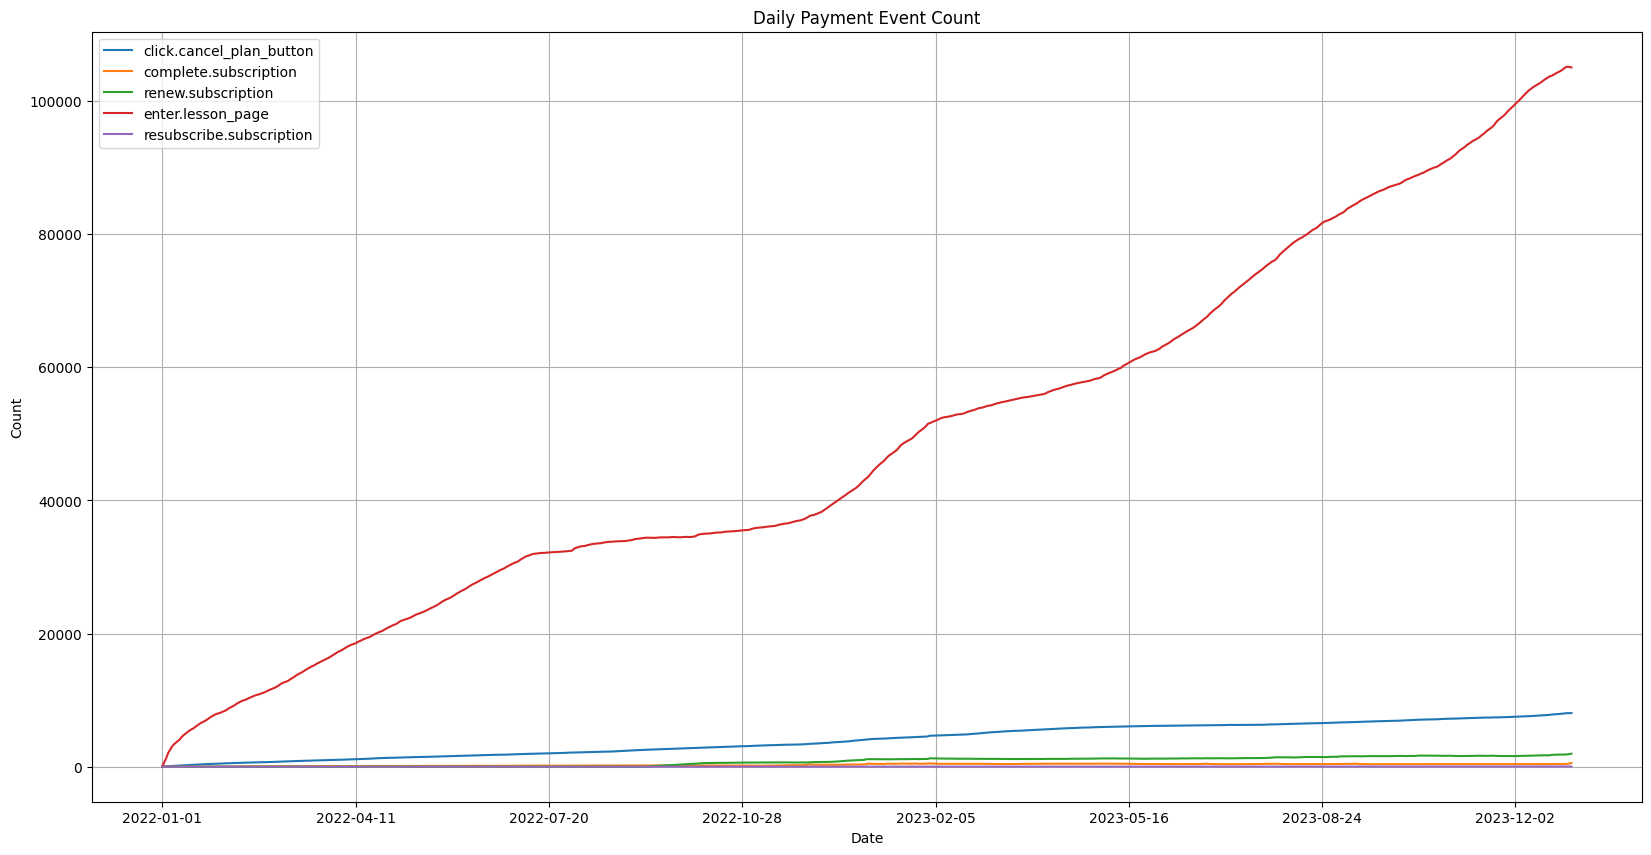

In [62]:
temp_df = pd.read_csv('payment_event_count.csv', index_col=0)
temp_df.to_csv('payment_event_count.csv', index=True)

# temp_df = df.copy()
temp_df = temp_df.drop('error', axis=1)

plot = temp_df.plot(figsize=(20, 10), title='Daily Payment Event Count', xlabel='Date', ylabel='Count', grid=True)

In [63]:
pay_duration = groupby_user_agg_muli_column(payment_df, get_pay_duration, ['plan.price'])
display(pay_duration)
non_pay_duration = groupby_user_agg_muli_column(payment_df, get_non_pay_duration, ['plan.price'])
display(non_pay_duration)


user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 20972, dtype: timedelta64[ns]

user_id
1                  [0 days 00:00:00, 2, 0]
2                 [0 days 00:00:00, 12, 0]
6                  [0 days 00:00:00, 2, 0]
21                 [0 days 00:00:00, 0, 0]
33                 [0 days 00:00:00, 5, 0]
                        ...               
179738             [0 days 00:00:00, 2, 0]
179741            [0 days 00:00:00, 12, 0]
179744             [0 days 00:00:00, 2, 0]
179745             [0 days 00:00:00, 0, 0]
179751    [69 days 11:22:46.326000, 10, 2]
Name: total, Length: 20972, dtype: object

In [64]:
# set df
non_pay_duration = non_pay_duration.apply(pd.Series)
non_pay_duration.columns = ['non_pay_duration', 'plan.price', 'before_plan.price']
non_pay_duration['plan.price'] = non_pay_duration['plan.price'].astype(int)
non_pay_duration['before_plan.price'] = non_pay_duration['before_plan.price'].astype(int)

display(non_pay_duration)

# filtering non_pay_duration 
result = non_pay_duration.loc[non_pay_duration['non_pay_duration'] > pd.Timedelta(0)]
display(result[result['before_plan.price'] == 0])

# result decoding
result['before_plan.price'] = encoder_dict['plan.price'].inverse_transform(result['before_plan.price'])
result['plan.price'] = encoder_dict['plan.price'].inverse_transform(result['plan.price'])

# sorting display
result = result[['plan.price', 'before_plan.price']].value_counts().sort_index()
result[result > 1]

non_pay_duration  plan.price  before_plan.price
user_id                                                       
1               0 days 00:00:00           2                  0
2               0 days 00:00:00          12                  0
6               0 days 00:00:00           2                  0
21              0 days 00:00:00           0                  0
33              0 days 00:00:00           5                  0
...                         ...         ...                ...
179738          0 days 00:00:00           2                  0
179741          0 days 00:00:00          12                  0
179744          0 days 00:00:00           2                  0
179745          0 days 00:00:00           0                  0
179751  69 days 11:22:46.326000          10                  2

[20972 rows x 3 columns]

non_pay_duration  plan.price  before_plan.price
user_id                                                        
1025    365 days 00:00:51.985000           9                  0
1202    346 days 05:18:23.053000           5                  0
2866    244 days 19:06:43.129000           5                  0
3754     33 days 11:35:13.578000           2                  0
3796    390 days 16:39:56.957000          10                  0
...                          ...         ...                ...
176326  366 days 14:29:29.559000           6                  0
176730   11 days 21:47:04.876000           8                  0
177013  528 days 04:14:22.935000           2                  0
178650    2 days 05:47:11.781000           2                  0
179119  167 days 21:41:54.804000          12                  0

[292 rows x 3 columns]

plan.price  before_plan.price
15920       15920                980
            42960                 13
            79200                  6
            131600                26
            NaN                   59
42960       15920                  4
            42960                 59
            131600                 2
            NaN                   11
79200       15920                 56
            42960                 27
            79200                  8
            131600                 9
            NaN                   71
83200       15920                 13
            42960                  2
            83200                  3
            131600                 2
            NaN                   31
87200       15920                  5
            42960                  5
            131600                 3
            NaN                   11
91200       15920                  2
            83200                  2
            91200                  2
        

In [65]:
price_list = [ int(x) for x in list(encoder_dict['plan.price'].classes_)[1:-1] ]
price_list = { x : 0 for x in price_list }

price_list[14328] = 1
price_list[15920] = 1
price_list[19920] = 1
price_list[42960] = 3
price_list[79200] = 12
price_list[83200] = 12
price_list[87200] = 12
price_list[91200] = 12
price_list[95200] = 12
price_list[95520] = 12
price_list[118440] = 12
price_list[131600] = 12

price_list

{14328: 1,
 15920: 1,
 19920: 1,
 42960: 3,
 79200: 12,
 83200: 12,
 87200: 12,
 91200: 12,
 95200: 12,
 95520: 12,
 118440: 12,
 131600: 12}

non_pay_duration  plan.price  before_plan.price
user_id                                                       
1               0 days 00:00:00           2                  0
2               0 days 00:00:00          12                  0
6               0 days 00:00:00           2                  0
21              0 days 00:00:00           0                  0
33              0 days 00:00:00           5                  0
...                         ...         ...                ...
179738          0 days 00:00:00           2                  0
179741          0 days 00:00:00          12                  0
179744          0 days 00:00:00           2                  0
179745          0 days 00:00:00           0                  0
179751  69 days 11:22:46.326000          10                  2

[20972 rows x 3 columns]

user_id
1               0.000
2               0.000
6               0.000
21              0.000
33              0.000
             ...     
179738          0.000
179741          0.000
179744          0.000
179745          0.000
179751    6002566.326
Name: non_pay_duration, Length: 20972, dtype: float64

117.70221445221445


<Axes: ylabel='Density'>

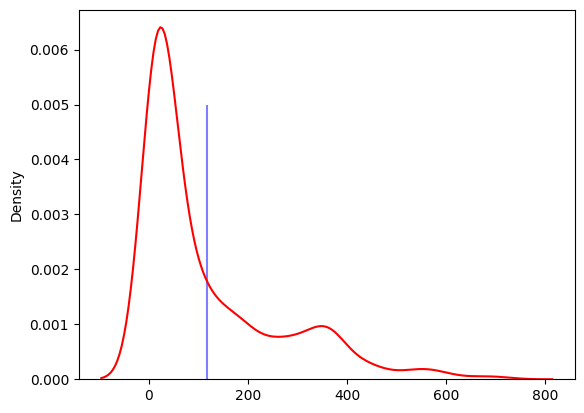

In [66]:
display(non_pay_duration)
display(non_pay_duration['non_pay_duration'].dt.total_seconds())
data = list(((non_pay_duration['non_pay_duration'].dt.total_seconds()) / (60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x != 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
sns.kdeplot(data, color='red', label='non_pay_duration')

user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 20972, dtype: timedelta64[ns]

array([2.10055452e+12, 1.99695228e+12, 2.45958629e+11, ...,
       8.96074869e+11, 1.88322214e+12, 7.62668948e+11])

200.5527295610677


<Axes: title={'center': 'pay_duration(Day)'}, ylabel='Density'>

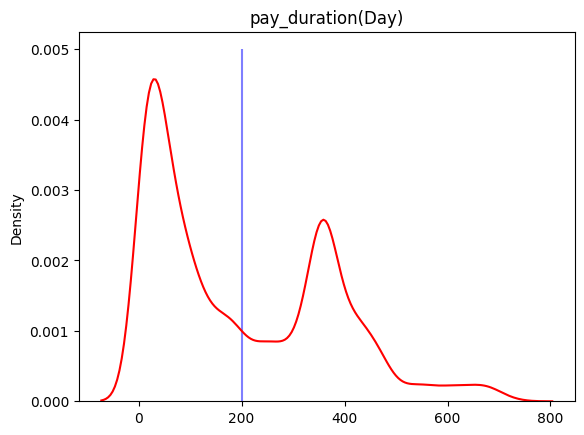

In [67]:
display(pay_duration)
display(pay_duration.values.astype(float) / 1000000000 * 60 * 60 * 24)
data = list((pay_duration.values.astype(float) / (1000000000 * 60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x > 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
plt.title('pay_duration(Day)')
sns.kdeplot(data, color='red', label='pay_duration')

### 해적지표 살펴보기

#### **획득**

1. **정의** : 회원가입을 한 유저
2. **정의 조건** : user_id ≠ ‘nan’( 회원 )
3. 이유: 회원 가입일자를 알 수 없는 고객의 수가 너무 많아서 \
complete.signup 데이터에서 확인 가능한 user_id에 국한되지 않음 
4. 주의사항 : 전체 회원 중 일부분(20% 가량)은 데이터 기간 밖에서 회원 가입을 함, \
획득 비율이나 비용계산은 어려우나, 회원 가입한 수는 complete.signup 데이터에서 확인할 수 있다, \ 
즉 비율과 비용을 구하는 것이 아닌, 이전에 수민님께서 이야기 하신 Frequency로 접근을 해야함

<Axes: title={'center': 'Cumulative Sign Up Count'}, xlabel='Date', ylabel='Count'>

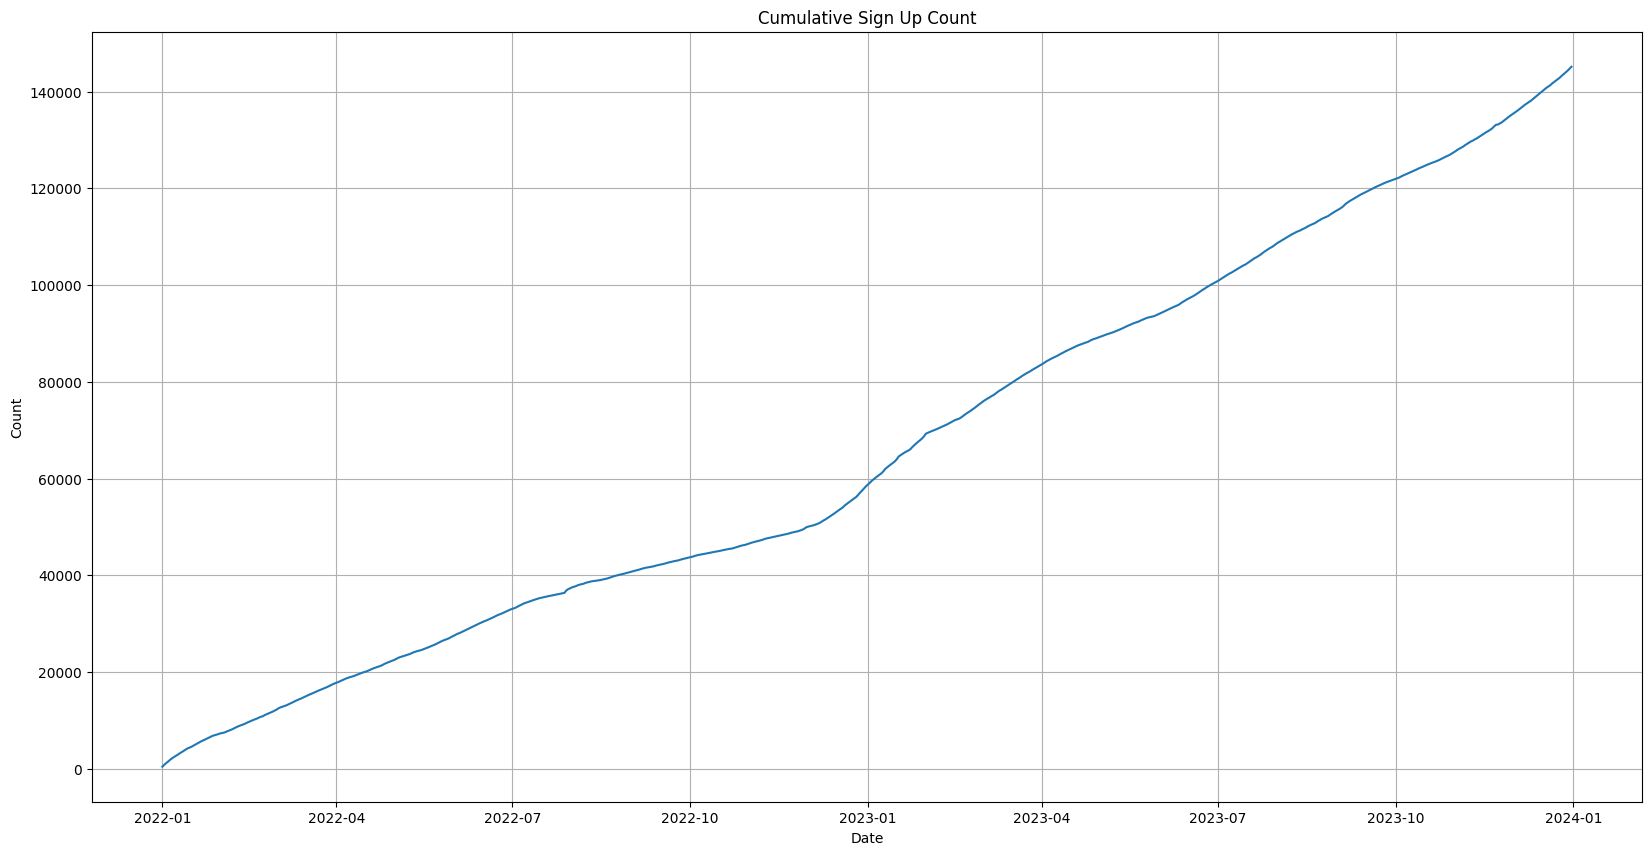

In [68]:
result = pd.concat([com_df_22[com_df_22['event_type'] == 3], com_df_23[com_df_23['event_type'] == 3]])
result = result\
    .groupby(result['client_event_time'].dt.date)['user_id']\
    .nunique().cumsum()

result.plot(figsize=(20, 10), title='Cumulative Sign Up Count', xlabel='Date', ylabel='Count', grid=True)

In [69]:
user_cumsum_22 = result[result.index < pd.to_datetime('2023-01-01').date()] + 34624
user_cumsum_22.index = pd.to_datetime(user_cumsum_22.index).strftime('%m-%d')
user_cumsum_23 = result[result.index > pd.to_datetime('2022-12-31').date()] + 34624
user_cumsum_23.index = pd.to_datetime(user_cumsum_23.index).strftime('%m-%d')

print(user_cumsum_22)
print(user_cumsum_23)

client_event_time
01-01    35046
01-02    35447
01-03    35808
01-04    36120
01-05    36478
         ...  
12-27    91256
12-28    91733
12-29    92130
12-30    92585
12-31    93011
Name: user_id, Length: 365, dtype: int64
client_event_time
01-01     93367
01-02     93743
01-03     94150
01-04     94475
01-05     94795
          ...  
12-27    178241
12-28    178597
12-29    178930
12-30    179329
12-31    179757
Name: user_id, Length: 365, dtype: int64


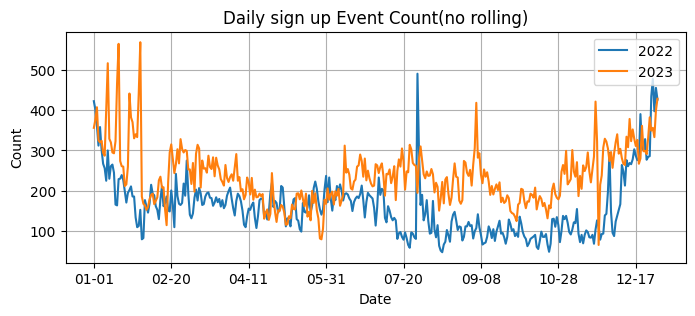

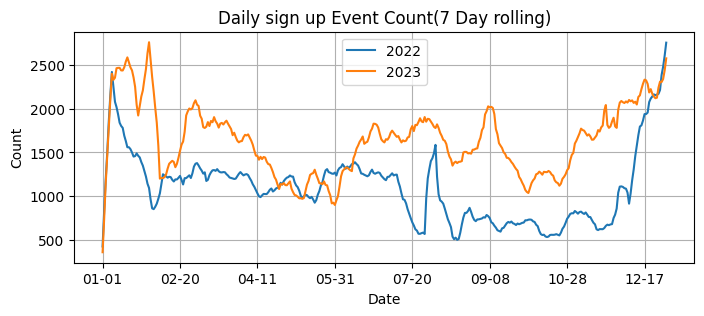

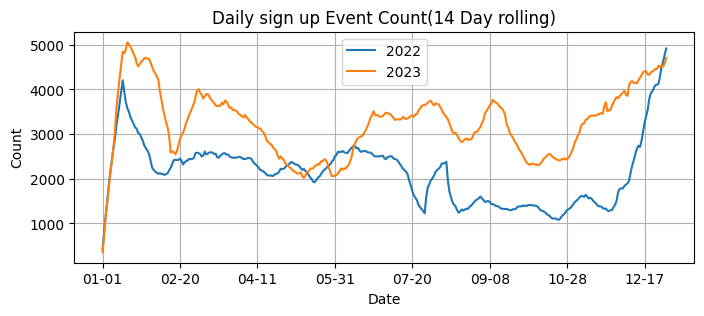

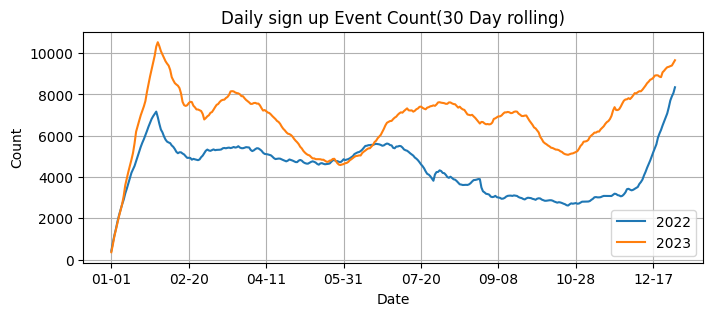

In [ ]:
%%skip  # << skipping >>
result_22 = com_df_22[com_df_22['event_type'] == 3]\
    .groupby(com_df_22['client_event_time'].dt.strftime("%m-%d"))['user_id']\
    .nunique()
result_23 = com_df_23[com_df_23['event_type'] == 3]\
    .groupby(com_df_23['client_event_time'].dt.strftime("%m-%d"))['user_id']\
    .nunique()
    
result_22\
    .plot(figsize=(8, 3), title='Daily sign up Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
result_23\
    .plot(figsize=(8, 3), xlabel='Date', grid=True)
    
plt.legend(['2022', '2023'])
plt.show()

for rolling_offset in [7, 14, 30]:    
    result_22\
        .rolling(rolling_offset, min_periods=1).sum()\
        .plot(figsize=(8, 3), title=f'Daily sign up Event Count({rolling_offset} Day rolling)', xlabel='Date', ylabel='Count', grid=True)
    result_23\
        .rolling(rolling_offset, min_periods=1).sum()\
        .plot(figsize=(8, 3), xlabel='Date', grid=True)

    plt.legend(['2022', '2023'])
    plt.show()

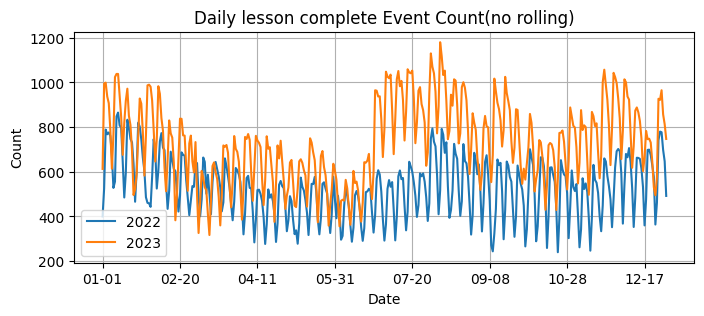

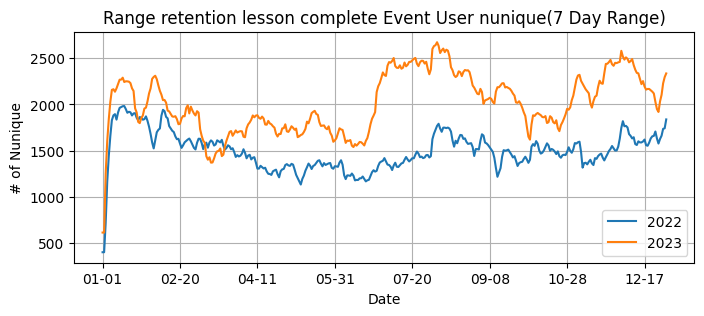

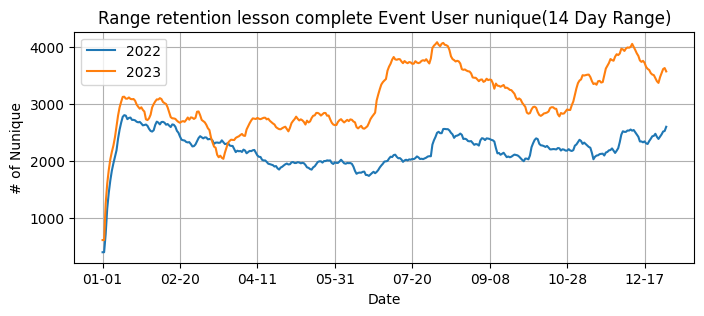

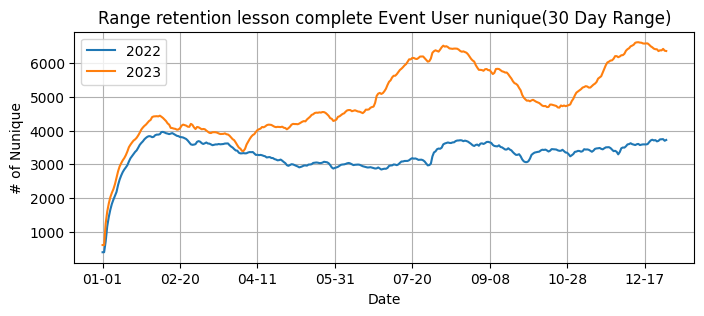

In [ ]:
ONLY_NEW_USER = False
user_id_in_df = user_indexs[user_indexs['event_type'] == 3]['user_id'].unique()

# set the target df
if ONLY_NEW_USER:
    dfs = [
        com_df_22.loc[(com_df_22['event_type'] == 14) & com_df_22['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']],
        com_df_23.loc[(com_df_23['event_type'] == 14) & com_df_23['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']]
    ]
else:
    dfs = [
        com_df_22.loc[com_df_22['event_type'] == 14, ['user_id', 'client_event_time']],
        com_df_23.loc[com_df_23['event_type'] == 14, ['user_id', 'client_event_time']]
    ]

# set time list
timelists = [
    pd.date_range('2022-01-01', '2022-12-31', freq='D').floor("D"),
    pd.date_range('2023-01-01', '2023-12-31', freq='D').floor("D")
]

# set result, temp
results = [[], []]
temps = [[], []]

# get results
for i in range(2):
    results[i] = dfs[i].groupby(dfs[i]['client_event_time'].dt.strftime("%m-%d"))['user_id'].nunique()
    temps[i] = pd.DataFrame(["01-01", results[i].iloc[0]])
    temps[i] = temps[i].T
    temps[i].columns = ['date', 'user_id_unique']

# display
results[0].plot(figsize=(8, 3), label='2022', title='Daily lesson complete Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
results[1].plot(figsize=(8, 3), label='2023', xlabel='Date', grid=True)
plt.legend()
plt.show()

# set result_list
result_list = [[], []]

for i in range(2):
    result_list[i] = [ results[i].copy() ]
    
# rolling count
for rolling_offset in [7, 14, 30]:
    # reset rolling
    results = [
        pd.DataFrame(temps[0].copy(), columns=['date', 'user_id_unique']),
        pd.DataFrame(temps[1].copy(), columns=['date', 'user_id_unique'])
    ]
    
    for j in range(2):
        for i in range(1, 365):
            # set mindate
            if i <= rolling_offset - 1:
                min_data = timelists[j][0]
            else:
                min_data = timelists[j][i + 1 - rolling_offset]
            
            # get rolling result
            rolling_result = dfs[j]\
                .loc[((dfs[j]['client_event_time'] >= pd.Timestamp(min_data))\
                    & (dfs[j]['client_event_time'] <= pd.Timestamp(timelists[j][i]))), 'user_id']\
                        .nunique()

            # set temp result
            temp = pd.DataFrame([timelists[j][i].strftime("%m-%d"), rolling_result])
            temp = temp.T
            temp.columns = ['date', 'user_id_unique']
                
            # concat            
            results[j] = pd.concat([results[j], temp])

        # set index
        results[j].set_index('date', inplace=True)
        
        # append result_list
        result_list[j].append(results[j].copy())

    # display
    results[0]['user_id_unique'].plot(figsize=(8, 3), label = '2022', title=f'Range retention lesson complete Event User nunique({rolling_offset} Day Range)', xlabel='Date', ylabel='# of Nunique', grid=True)
    results[1]['user_id_unique'].plot(figsize=(8, 3), label = '2023', xlabel='Date', grid=True)
    
    plt.legend()
    plt.show()

In [72]:
%%skip  # << skipping >>
# display result_list
for i in range(2):
    result_list[i][0].plot(figsize=(10, 6), title=f'Range retention lesson complete Event User nunique', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{2022+i} : 1 Day')
    result_list[i][1]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 7 Day')
    result_list[i][2]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 14 Day')
    result_list[i][3]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 30 Day')
    
    plt.legend()
    plt.show()

user_cumsum_list = [user_cumsum_22, user_cumsum_23]
# display result_list
for i in range(2):
    (result_list[i][0] / user_cumsum_list[i]).plot(figsize=(10, 6), title=f'Range retention lesson complete Event User nunique', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{2022+i} : 1 Day')
    (result_list[i][1]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 7 Day')
    (result_list[i][2]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 14 Day')
    (result_list[i][3]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 30 Day')
    
    plt.legend()
    plt.show()


#### Retention

In [73]:
## base values

# set retention_range
retention_range = 120

# set base_df
base_df = pd.concat([com_df_22[com_df_22['event_type'] == 14], com_df_23[com_df_23['event_type'] == 14]])
base_df = base_df[['user_id', 'client_event_time']]

# set base_user
base_user = pd.concat([com_df_22[com_df_22['event_type'] == 3], com_df_23[com_df_23['event_type'] == 3]])
base_user = base_user[['user_id', 'client_event_time']]
base_user = base_user.rename(columns={'client_event_time' : 'sign_up_time'})


first_active = base_df.groupby('user_id')['client_event_time'].min()

base_user = pd.merge(base_user, first_active, on='user_id', how='left')
base_user.rename(columns={'client_event_time' : 'first_Active'}, inplace=True)
base_user.fillna({'first_Active' : MAX_DATE}, inplace=True)
base_user

user_id            sign_up_time            first_Active
0         75470 2022-01-01 00:06:31.232 2023-12-31 23:59:35.209
1        116537 2022-01-01 00:10:21.400 2023-12-31 23:59:35.209
2         91459 2022-01-01 00:10:49.730 2023-12-31 23:59:35.209
3         52661 2022-01-01 00:12:18.251 2023-12-31 23:59:35.209
4         85468 2022-01-01 00:26:03.194 2023-12-31 23:59:35.209
...         ...                     ...                     ...
145128    94982 2023-12-31 23:26:30.981 2023-12-31 23:59:35.209
145129    19383 2023-12-31 23:29:56.754 2023-12-31 23:38:50.860
145130      343 2023-12-31 23:31:56.109 2023-12-31 23:59:35.209
145131    92860 2023-12-31 23:38:08.737 2023-12-31 23:59:35.209
145132    22618 2023-12-31 23:51:53.728 2023-12-31 23:59:35.209

[145133 rows x 3 columns]

In [74]:
user_date_range = pd.date_range('2021-12-31', '2023-12-31', freq='M').floor("D")
print(user_date_range)

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31'],
              dtype='datetime64[ns]', freq=None)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\4070417822.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  user_date_range = pd.date_range('2021-12-31', '2023-12-31', freq='M').floor("D")


In [75]:
def get_retention(base_df, user, target_name, retention_range, start_base):
    '''   
    start_base : sign_up_time / first_Active
    '''
    
    # exeption handling
    if user.empty:
        return None
    
    # get df
    result = pd.merge(base_df, user, on='user_id', how='inner')
    result['active_day'] = (result['client_event_time'] - result[start_base]).dt.days
    result = result.drop('client_event_time', axis=1)
    result = result.drop(result[result['active_day'] < 0].index, axis=0)
    result = result.drop_duplicates(['user_id', 'active_day'])

    # set max_nunique
    if start_base == 'sign_up_time':
        max_nunique = user['user_id'].nunique()
    else:
        max_nunique = result['user_id'].nunique()

    # set the max_active_day
    max_active_day = result['active_day'].max()
    if max_active_day > retention_range:
        max_active_day = retention_range

    # set retentions
    retentions = []

    for window_size in [1, 7, 14, 30]:
        retention = pd.DataFrame(columns=['active_day', 'nunique'])
        
        temp_init_df = pd.DataFrame([[max, 0] for max in range(window_size)], columns=['active_day', 'nunique'])
                                    
        retention = pd.concat([retention, temp_init_df])
        
        for min in range(max_active_day - window_size + 1):
            max = min + window_size
            mask = (result['active_day'] >= min) & (result['active_day'] < max)
            temp = result.loc[mask, 'user_id'].nunique()
            retention = pd.concat([retention, pd.DataFrame([[max, temp]], columns=['active_day', 'nunique'])])
        
        retention['nunique'] = retention['nunique'] / max_nunique * 100
        retention.loc[retention['active_day'] < window_size, 'nunique'] = retention['nunique'].max()
        retention.set_index('active_day', inplace=True)
        
        retentions.append(retention)

    # add plotting
    for i, window_size in enumerate([1, 7, 14, 30]):
        retentions[i]['nunique'].plot(figsize=(8, 3), label=f'{window_size} Day', title=f'{target_name} Range Retention', xlabel=f'N-Day after {start_base}', ylabel='Retention Rate', grid=True)

    # set display
    plt.legend()
    plt.vlines(1, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(7, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(14, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(30, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(60, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(90, 0, 10, color='gray', alpha=0.3, linestyles='dashed')

    # display
    plt.show()
    
    # return
    return pd.DataFrame([[target_name, 
                          round(retentions[0]['nunique'][2], 2), 
                          round(retentions[0]['nunique'][3], 2),
                          round(retentions[1]['nunique'][14], 2),
                          round(retentions[1]['nunique'][21], 2),
                          round(retentions[3]['nunique'][60], 2),
                          round(retentions[3]['nunique'][90], 2)]], 
                        columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

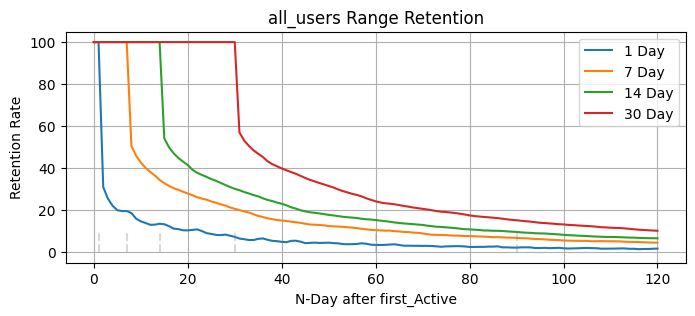

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\673876441.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_retention_df = pd.concat([all_retention_df, result])


group_name   day1   day2  week1  week2  month1  month2
0  all_users  30.93  25.41  34.36  27.07   24.15   15.15

In [76]:
all_retention_df = pd.DataFrame(columns=['group_name'
                                 ,'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

# get max_timeline
max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')
# filtering
user = base_user[base_user['sign_up_time'] < max_timeline]

target_name = 'all_users'

result = get_retention(base_df, user, target_name, retention_range, 'first_Active')

all_retention_df = pd.concat([all_retention_df, result])
    
all_retention_df.reset_index(drop=True, inplace=True)
all_retention_df

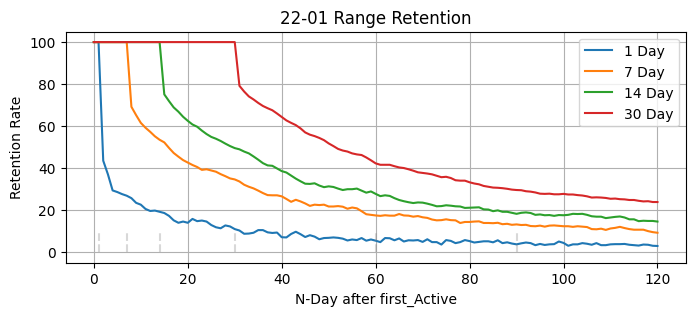

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\3130664041.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  retention_index_df = pd.concat([retention_index_df, result])


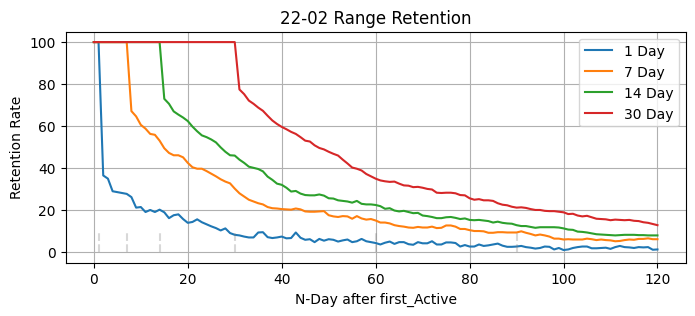

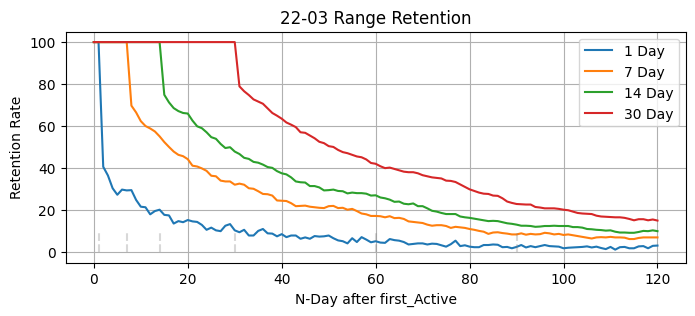

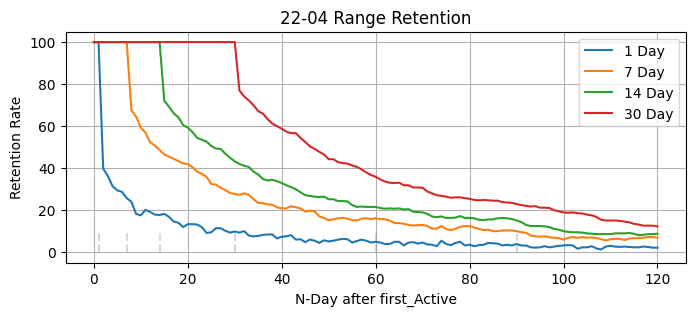

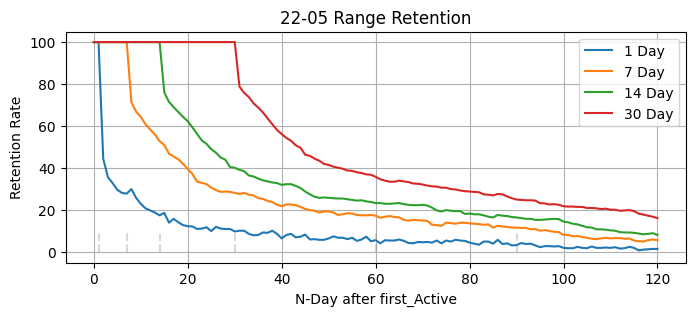

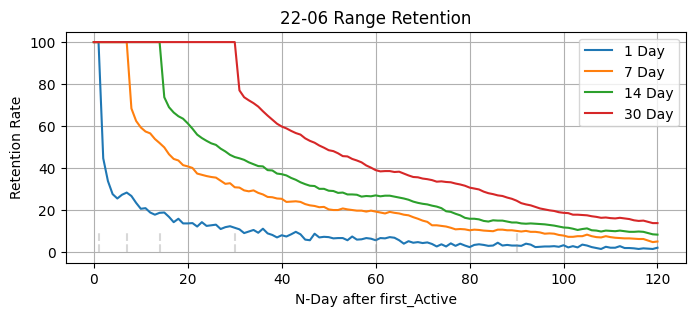

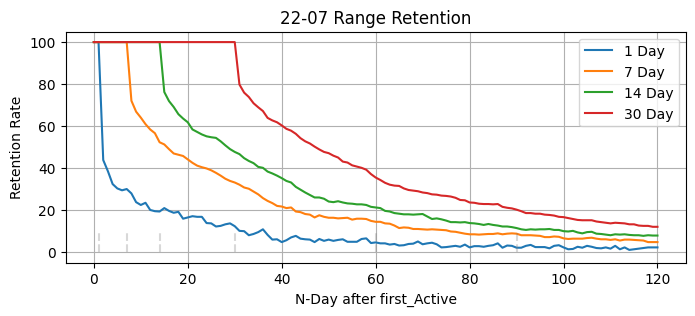

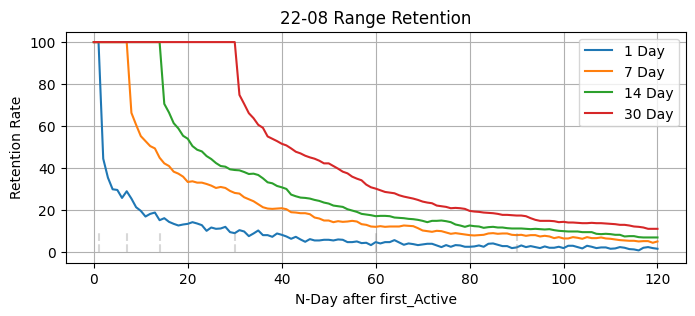

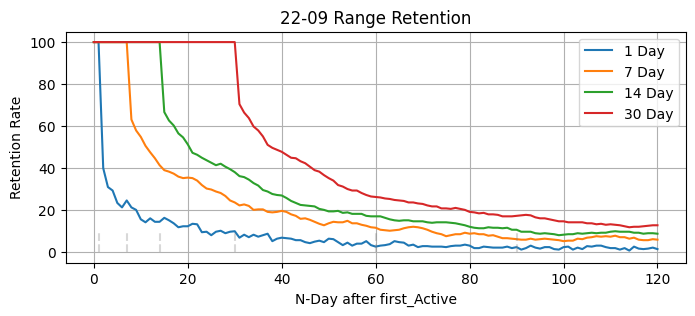

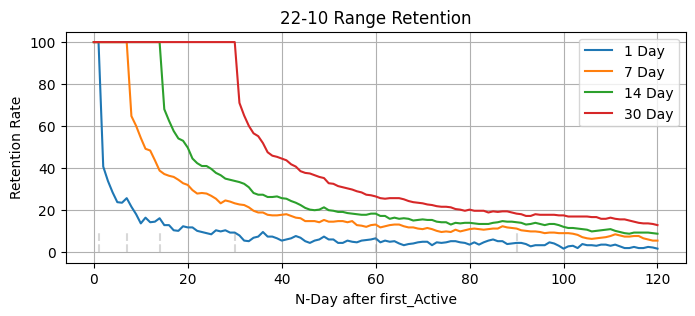

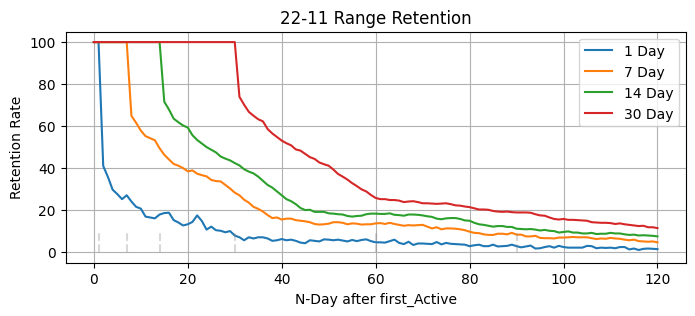

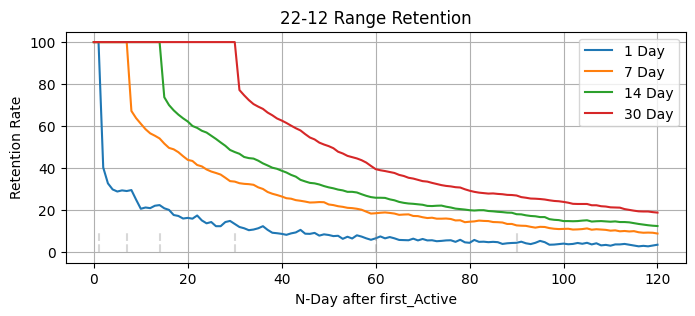

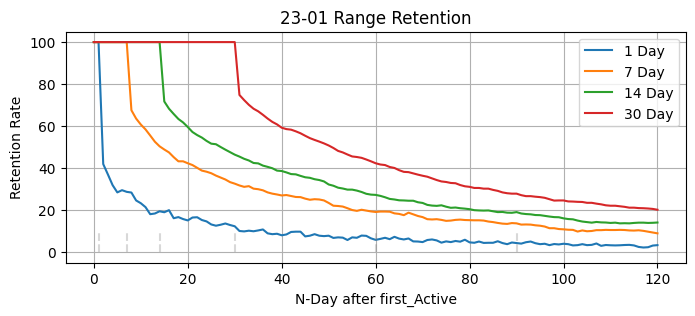

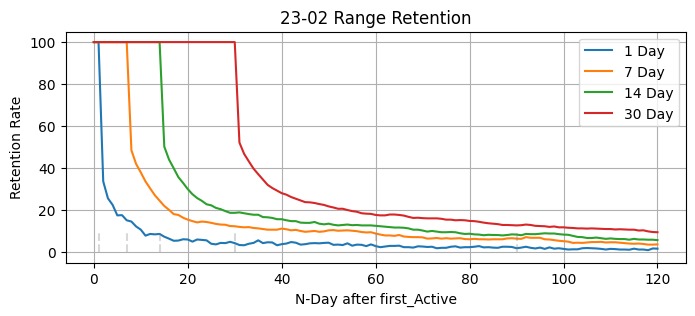

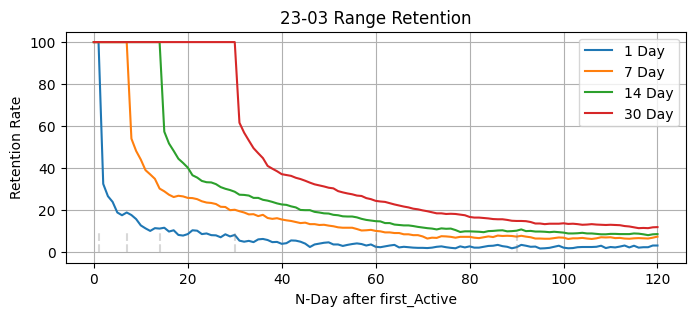

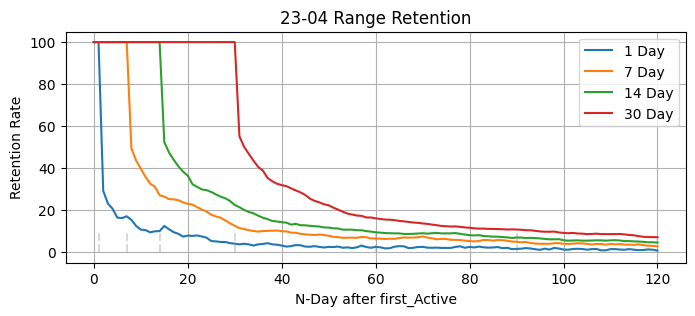

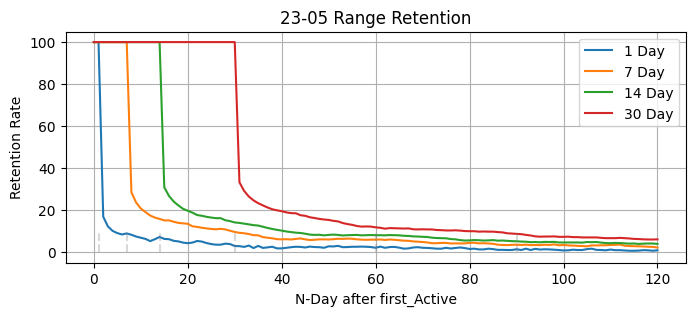

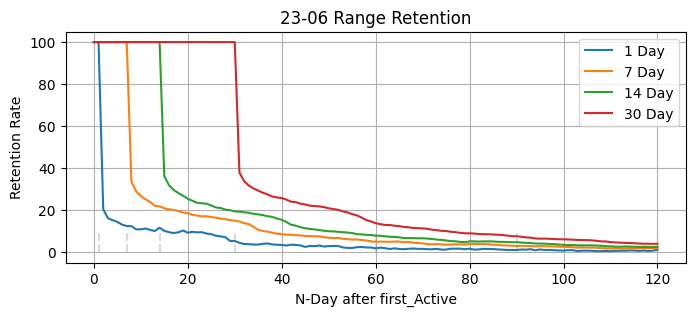

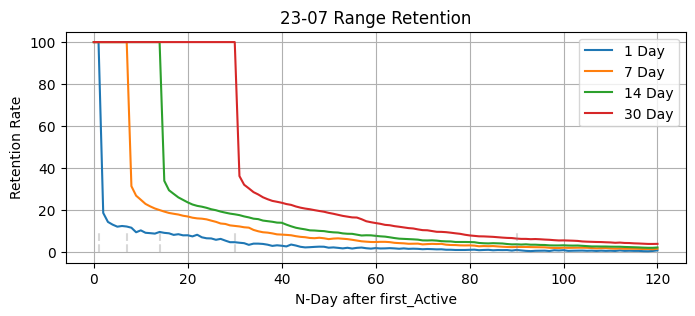

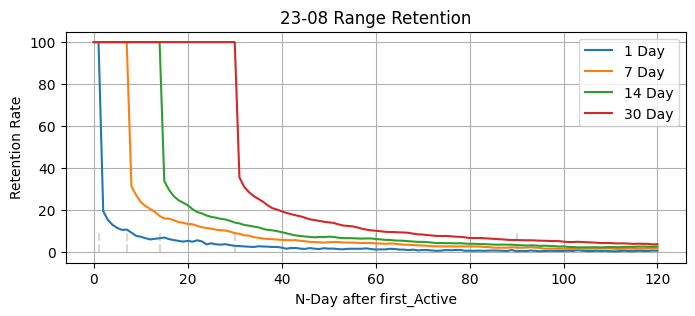

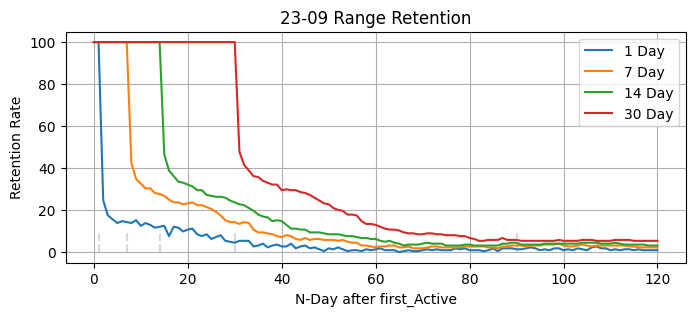

group_name   day1   day2  week1  week2  month1  month2
0       22-01  43.51  37.02  53.49  41.47   42.25   29.55
1       22-02  36.49  34.96  53.06  40.39   34.96   21.17
2       22-03  40.62  36.48  55.11  41.14   42.04   22.90
3       22-04  39.69  36.19  48.60  40.38   35.84   22.90
4       22-05  44.50  35.67  52.83  37.17   35.83   25.00
5       22-06  44.66  33.83  51.93  40.06   39.02   24.48
6       22-07  43.83  38.48  52.30  42.50   35.51   20.21
7       22-08  44.46  35.44  44.94  33.70   30.22   17.41
8       22-09  39.95  30.97  41.37  35.22   26.24   17.26
9       22-10  40.71  33.88  38.80  29.51   26.50   18.31
10      22-11  40.99  35.77  49.44  38.87   25.77   18.87
11      22-12  40.26  32.72  54.11  43.38   39.50   26.94
12      23-01  41.90  36.95  50.36  41.44   42.30   27.83
13      23-02  33.64  25.61  24.49  14.74   17.68   12.70
14      23-03  32.46  26.61  30.24  25.71   24.40   14.82
15      23-04  29.14  23.13  27.09  22.56   16.05   10.75
16      23-05  16.85  12.20  15.80  12.27   11.78    8.67
17      23-06  20.43  16.14  21.79  17.71   13.76    7.56
18      23-07  18.64  14.36  20.00  16.37   13.82    6.43
19      23-08  19.45  15.27  17.22  13.23   10.16    5.78
20      23-09  24.55  17.41  27.68  23.66   12.95    5.80

In [77]:
retention_index_df = pd.DataFrame(columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

for start, end in zip(user_date_range[:-1], user_date_range[1:]):
    # get max_timeline
    max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')
    # filtering
    user = base_user[base_user['sign_up_time'] < max_timeline]
    user = user[(user['sign_up_time'] >= start) & (user['sign_up_time'] < end)]

    target_name = end.strftime('%y-%m')
    
    result = get_retention(base_df, user, target_name, retention_range, 'first_Active')

    retention_index_df = pd.concat([retention_index_df, result])
    
retention_index_df.reset_index(drop=True, inplace=True)
retention_index_df

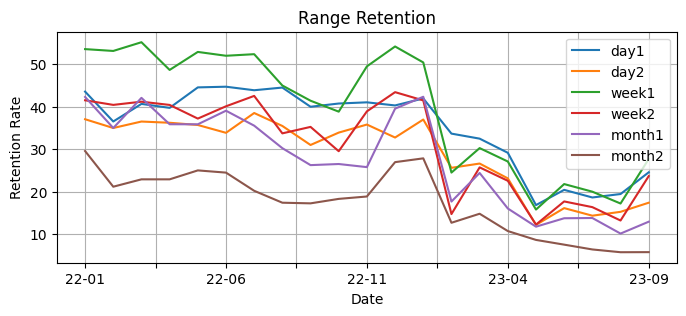

In [78]:
target_df = retention_index_df.set_index('group_name')

for col in target_df.columns:
    target_df[col].plot(figsize=(8, 3), title=f'Range Retention', xlabel='Date', ylabel='Retention Rate', grid=True)

plt.legend()
plt.show()

In [79]:
retention_index_df = pd.concat([all_retention_df, retention_index_df])
retention_index_df.reset_index(drop=True, inplace=True)
retention_index_df

group_name   day1   day2  week1  week2  month1  month2
0   all_users  30.93  25.41  34.36  27.07   24.15   15.15
1       22-01  43.51  37.02  53.49  41.47   42.25   29.55
2       22-02  36.49  34.96  53.06  40.39   34.96   21.17
3       22-03  40.62  36.48  55.11  41.14   42.04   22.90
4       22-04  39.69  36.19  48.60  40.38   35.84   22.90
5       22-05  44.50  35.67  52.83  37.17   35.83   25.00
6       22-06  44.66  33.83  51.93  40.06   39.02   24.48
7       22-07  43.83  38.48  52.30  42.50   35.51   20.21
8       22-08  44.46  35.44  44.94  33.70   30.22   17.41
9       22-09  39.95  30.97  41.37  35.22   26.24   17.26
10      22-10  40.71  33.88  38.80  29.51   26.50   18.31
11      22-11  40.99  35.77  49.44  38.87   25.77   18.87
12      22-12  40.26  32.72  54.11  43.38   39.50   26.94
13      23-01  41.90  36.95  50.36  41.44   42.30   27.83
14      23-02  33.64  25.61  24.49  14.74   17.68   12.70
15      23-03  32.46  26.61  30.24  25.71   24.40   14.82
16      23-04  29.14  23.13  27.09  22.56   16.05   10.75
17      23-05  16.85  12.20  15.80  12.27   11.78    8.67
18      23-06  20.43  16.14  21.79  17.71   13.76    7.56
19      23-07  18.64  14.36  20.00  16.37   13.82    6.43
20      23-08  19.45  15.27  17.22  13.23   10.16    5.78
21      23-09  24.55  17.41  27.68  23.66   12.95    5.80

In [80]:
retention_index_df['d_rate'] = round(retention_index_df['day2'] / retention_index_df['day1'] * 100, 2)
retention_index_df['w_rate'] = round(retention_index_df['week2'] / retention_index_df['week1'] * 100, 2)
retention_index_df['m_rate'] = round(retention_index_df['month2'] / retention_index_df['month1'] * 100, 2)

retention_index_df

group_name   day1   day2  week1  week2  month1  month2  d_rate  w_rate  \
0   all_users  30.93  25.41  34.36  27.07   24.15   15.15   82.15   78.78   
1       22-01  43.51  37.02  53.49  41.47   42.25   29.55   85.08   77.53   
2       22-02  36.49  34.96  53.06  40.39   34.96   21.17   95.81   76.12   
3       22-03  40.62  36.48  55.11  41.14   42.04   22.90   89.81   74.65   
4       22-04  39.69  36.19  48.60  40.38   35.84   22.90   91.18   83.09   
5       22-05  44.50  35.67  52.83  37.17   35.83   25.00   80.16   70.36   
6       22-06  44.66  33.83  51.93  40.06   39.02   24.48   75.75   77.14   
7       22-07  43.83  38.48  52.30  42.50   35.51   20.21   87.79   81.26   
8       22-08  44.46  35.44  44.94  33.70   30.22   17.41   79.71   74.99   
9       22-09  39.95  30.97  41.37  35.22   26.24   17.26   77.52   85.13   
10      22-10  40.71  33.88  38.80  29.51   26.50   18.31   83.22   76.06   
11      22-11  40.99  35.77  49.44  38.87   25.77   18.87   87.27   78.62   
12      22-12  40.26  32.72  54.11  43.38   39.50   26.94   81.27   80.17   
13      23-01  41.90  36.95  50.36  41.44   42.30   27.83   88.19   82.29   
14      23-02  33.64  25.61  24.49  14.74   17.68   12.70   76.13   60.19   
15      23-03  32.46  26.61  30.24  25.71   24.40   14.82   81.98   85.02   
16      23-04  29.14  23.13  27.09  22.56   16.05   10.75   79.38   83.28   
17      23-05  16.85  12.20  15.80  12.27   11.78    8.67   72.40   77.66   
18      23-06  20.43  16.14  21.79  17.71   13.76    7.56   79.00   81.28   
19      23-07  18.64  14.36  20.00  16.37   13.82    6.43   77.04   81.85   
20      23-08  19.45  15.27  17.22  13.23   10.16    5.78   78.51   76.83   
21      23-09  24.55  17.41  27.68  23.66   12.95    5.80   70.92   85.48   

    m_rate  
0    62.73  
1    69.94  
2    60.55  
3    54.47  
4    63.90  
5    69.77  
6    62.74  
7    56.91  
8    57.61  
9    65.78  
10   69.09  
11   73.22  
12   68.20  
13   65.79  
14   71.83  
15   60.74  
16   66.98  
17   73.60  
18   54.94  
19   46.53  
20   56.89  
21   44.79

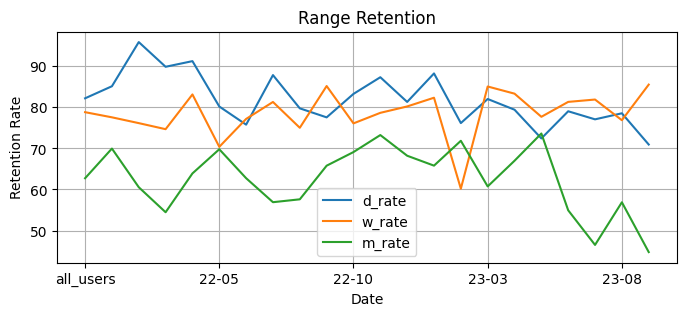

In [81]:
target_df = retention_index_df.set_index('group_name')

for col in target_df.columns[6:]:
    target_df[col].plot(figsize=(8, 3), title=f'Range Retention', xlabel='Date', ylabel='Retention Rate', grid=True)

plt.legend()
plt.show()

In [96]:
temp = retention_index_df.copy()
temp.iloc[1:, 1:10] = temp.iloc[1:, 1:10] - temp.iloc[0, 1:10]
temp['score'] = temp.iloc[:, 1:6].sum(axis=1)
temp


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\921595522.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[12.579999999999998 5.560000000000002 9.689999999999998 8.759999999999998
 13.57 13.729999999999997 12.899999999999999 13.530000000000001
 9.020000000000003 9.780000000000001 10.060000000000002 9.329999999999998
 10.969999999999999 2.710000000000001 1.5300000000000011
 -1.7899999999999991 -14.079999999999998 -10.5 -12.29 -11.48
 -6.379999999999999]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp.iloc[1:, 1:10] = temp.iloc[1:, 1:10] - temp.iloc[0, 1:10]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\921595522.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[11.610000000000003 9.55 11.069999999999997 10.779999999999998
 10.2600000000000

group_name   day1   day2  week1  week2 month1 month2 d_rate w_rate m_rate  \
0   all_users  30.93  25.41  34.36  27.07  24.15  15.15  82.15  78.78  62.73   
1       22-01  12.58  11.61  19.13   14.4   18.1   14.4   2.93  -1.25   7.21   
2       22-02   5.56   9.55   18.7  13.32  10.81   6.02  13.66  -2.66  -2.18   
3       22-03   9.69  11.07  20.75  14.07  17.89   7.75   7.66  -4.13  -8.26   
4       22-04   8.76  10.78  14.24  13.31  11.69   7.75   9.03   4.31   1.17   
5       22-05  13.57  10.26  18.47   10.1  11.68   9.85  -1.99  -8.42   7.04   
6       22-06  13.73   8.42  17.57  12.99  14.87   9.33   -6.4  -1.64   0.01   
7       22-07   12.9  13.07  17.94  15.43  11.36   5.06   5.64   2.48  -5.82   
8       22-08  13.53  10.03  10.58   6.63   6.07   2.26  -2.44  -3.79  -5.12   
9       22-09   9.02   5.56   7.01   8.15   2.09   2.11  -4.63   6.35   3.05   
10      22-10   9.78   8.47   4.44   2.44   2.35   3.16   1.07  -2.72   6.36   
11      22-11  10.06  10.36  15.08   11.8   1.62   3.72   5.12  -0.16  10.49   
12      22-12   9.33   7.31  19.75  16.31  15.35  11.79  -0.88   1.39   5.47   
13      23-01  10.97  11.54   16.0  14.37  18.15  12.68   6.04   3.51   3.06   
14      23-02   2.71    0.2  -9.87 -12.33  -6.47  -2.45  -6.02 -18.59    9.1   
15      23-03   1.53    1.2  -4.12  -1.36   0.25  -0.33  -0.17   6.24  -1.99   
16      23-04  -1.79  -2.28  -7.27  -4.51   -8.1   -4.4  -2.77    4.5   4.25   
17      23-05 -14.08 -13.21 -18.56  -14.8 -12.37  -6.48  -9.75  -1.12  10.87   
18      23-06  -10.5  -9.27 -12.57  -9.36 -10.39  -7.59  -3.15    2.5  -7.79   
19      23-07 -12.29 -11.05 -14.36  -10.7 -10.33  -8.72  -5.11   3.07  -16.2   
20      23-08 -11.48 -10.14 -17.14 -13.84 -13.99  -9.37  -3.64  -1.95  -5.84   
21      23-09  -6.38   -8.0  -6.68  -3.41  -11.2  -9.35 -11.23    6.7 -17.94   

     score  
0   141.92  
1    75.82  
2    57.94  
3    73.47  
4    58.78  
5    64.08  
6    67.58  
7     70.7  
8    46.84  
9    31.83  
10   27.48  
11   48.92  
12   68.05  
13   71.03  
14  -25.76  
15    -2.5  
16  -23.95  
17  -73.02  
18  -52.09  
19  -58.73  
20  -66.59  
21  -35.67

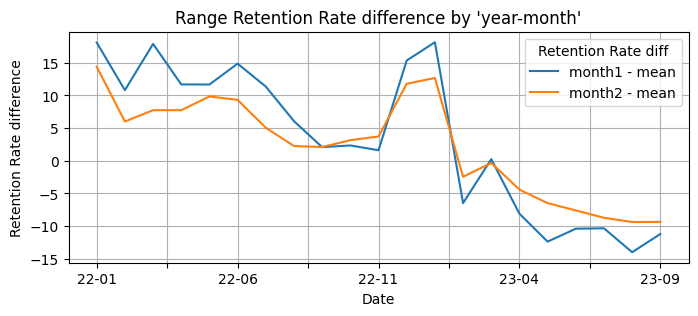

In [112]:
target_df = temp.set_index('group_name')

target_df.iloc[1:, 4:6].plot(figsize=(8, 3), 
                             title=f"Range Retention Rate difference by 'year-month'", 
                             xlabel='Date', 
                             ylabel='Retention Rate difference', grid=True)

plt.legend(title = 'Retention Rate diff', labels = ['month1 - mean', 'month2 - mean'])
plt.show()

### lesson

In [84]:
target_col = [
    'user_id', 
    'lesson.id', 
    'content.id',
    'client_event_time'
    ]

lesson_df_22 = df_2022.loc[df_2022['event_type'] == 14, target_col]
lesson_df_23 = df_2023.loc[df_2023['event_type'] == 14, target_col]

lesson_df = pd.concat([lesson_df_22, lesson_df_23], axis=0)

print(lesson_df.duplicated().sum())
lesson_df = lesson_df.drop_duplicates()


5


In [85]:
content_diff = pd.concat([df_2022.loc[df_2022['event_type'] == 12, ['content.id', 'content.difficulty']]\
                        , df_2023.loc[df_2023['event_type'] == 12, ['content.id', 'content.difficulty']]]\
                        , axis=0)

print(encoder_dict['content.difficulty'].classes_)
print(content_diff.groupby('content.id')['content.difficulty'].nunique().max())
display(content_diff['content.difficulty'])
content_diff['content.difficulty'] = content_diff['content.difficulty']\
                                .map({0 : 0, 1 : 3, 2 : 1, 4 : 2, 3 : 4, 5 : 5})
display(content_diff['content.difficulty'])

content_diff = content_diff.groupby('content.id')['content.difficulty'].mean().round(1)
content_diff = content_diff.reset_index()
display(content_diff)
content_default_diff = 2.5

[nan 'advanced' 'beginner' 'hard' 'intermediate' None]
3


7867111     2
7867161     4
7867335     2
7867931     2
7867937     1
           ..
20007861    4
20007915    4
20007926    2
20007943    2
20007974    2
Name: content.difficulty, Length: 124917, dtype: int16

7867111     1
7867161     2
7867335     1
7867931     1
7867937     3
           ..
20007861    2
20007915    2
20007926    1
20007943    1
20007974    1
Name: content.difficulty, Length: 124917, dtype: int64

content.id  content.difficulty
0             4                 3.0
1             5                 2.0
2             7                 2.0
3             8                 2.0
4             9                 1.0
..          ...                 ...
146         207                 1.0
147         208                 2.0
148         209                 2.0
149         210                 1.0
150         211                 1.0

[151 rows x 2 columns]

In [133]:
con_nu = lesson_df.groupby(['content.id'])['user_id'].nunique().sort_values(ascending=False) 
display(con_nu)
con_les_nu = lesson_df.groupby(['content.id', 'lesson.id'])['user_id'].nunique().sort_values(ascending=False)
display(con_les_nu)
con_les_nu_mean = con_les_nu.groupby(['content.id']).mean()
display(con_les_nu_mean)
con_les_nu_cnt = con_les_nu.groupby(['content.id']).count()
display(con_les_nu_cnt)

limit_min_nu = int(con_nu.max() / con_nu.size)
target_con = con_nu[con_nu > limit_min_nu].index

denominator = con_les_nu_mean[con_les_nu_mean.index.isin(target_con)]
numerator = con_nu[con_nu.index.isin(target_con)]

display(denominator.sort_values())
display(numerator.sort_values())
display(((denominator / numerator) * 100).sort_values() )

con_df = pd.DataFrame(numerator, columns=['con_nu'])
con_df['con_nu'] = numerator
con_df['con_les_nu_mean'] = round(denominator, 2)
con_df['num_of_effected_users'] = 0

con_df['con_les_nu_rate'] = round(denominator / numerator * 100, 2)
con_df['con_les_nu_cnt'] = con_les_nu_cnt[con_les_nu_cnt.index.isin(target_con)]

con_df['con_nu'] = con_df['con_nu'].astype(int)
con_df['con_les_nu_mean'] = con_df['con_les_nu_mean'].astype(int)

con_df = pd.merge(con_df, content_diff, on='content.id', how='left')
con_df.fillna({'content.difficulty' : content_default_diff}, inplace=True)

display(con_df)


content.id
201    25865
85     13701
200    12030
74      9415
93      8307
       ...  
49         1
158        1
160        1
174        1
19         1
Name: user_id, Length: 168, dtype: int64

content.id  lesson.id
201         4121         21534
            2074         20812
            3563         19977
            2664         19279
            480          18669
                         ...  
66          5274             1
160         5146             1
205         1436             1
160         4763             1
62          2486             1
Name: user_id, Length: 5050, dtype: int64

content.id
4       723.840000
5        35.000000
6        36.000000
7        30.000000
8       798.541667
          ...     
207       1.000000
208     138.540541
209       9.666667
210     108.379310
211    3355.181818
Name: user_id, Length: 168, dtype: float64

content.id
4      25
5       2
6       2
7       2
8      24
       ..
207     1
208    37
209    48
210    29
211    22
Name: user_id, Length: 168, dtype: int64

content.id
136       87.620690
133       91.657143
141       99.192308
170      101.968750
13       105.200000
           ...     
93      6148.000000
85      6989.714286
74      7707.888889
200     9592.704545
201    16047.777778
Name: user_id, Length: 92, dtype: float64

content.id
194      161
133      162
141      163
28       164
136      165
       ...  
93      8307
74      9415
200    12030
85     13701
201    25865
Name: user_id, Length: 92, dtype: int64

content.id
206     40.216390
208     43.159047
170     45.118916
159     47.609497
30      48.381688
          ...    
172     85.123031
204     85.985407
211     90.265855
52      93.835858
194    100.000000
Name: user_id, Length: 92, dtype: float64

content.id  con_nu  con_les_nu_mean  num_of_effected_users  \
0          201   25865            16047                      0   
1           85   13701             6989                      0   
2          200   12030             9592                      0   
3           74    9415             7707                      0   
4           93    8307             6148                      0   
..         ...     ...              ...                    ...   
87         136     165               87                      0   
88          28     164              120                      0   
89         141     163               99                      0   
90         133     162               91                      0   
91         194     161              161                      0   

    con_les_nu_rate  con_les_nu_cnt  content.difficulty  
0             62.04              18                 1.0  
1             51.02              21                 1.0  
2             79.74              44                 2.0  
3             81.87              27                 2.0  
4             74.01              20                 1.0  
..              ...             ...                 ...  
87            53.10              29                 4.0  
88            73.72              21                 3.0  
89            60.85              78                 3.0  
90            56.58              35                 3.0  
91           100.00               5                 2.0  

[92 rows x 7 columns]

#### get content effect in users

In [114]:
user_con_mean = lesson_df.groupby('user_id')['content.id'].nunique()
user_con_cnt = lesson_df.groupby('user_id')['content.id'].count()

result = round(lesson_df.groupby(['user_id', 'content.id'])['content.id'].count() / user_con_cnt * 100, 2)
result = pd.DataFrame(result)
result = result.rename(columns={'content.id' : 'content_ratio'})
result = result.reset_index()

mask = result.groupby('user_id')['content_ratio'].idxmax()

content_effect_df = result.loc[mask]
content_effect_df = content_effect_df.reset_index(drop=True)

base_ratio = int(100 / user_con_mean.mean())
print(user_con_mean.mean())

target_user = content_effect_df.loc[content_effect_df['content_ratio'] > base_ratio]
display(target_user)
target_user[target_user['content.id'] == 201]['user_id'].nunique()

4.147414608618642


user_id  content.id  content_ratio
0            1         200          39.53
1            2           8          50.00
2            6         167          41.07
3           12         159         100.00
5           15          85         100.00
...        ...         ...            ...
49677   179733         112          41.43
49678   179738         200          35.48
49679   179741         201         100.00
49680   179744         200          24.59
49681   179745         159         100.00

[43850 rows x 3 columns]

9918

[0] : 194 : 161 : 100.0
Not enough user data : 194 lesson.user : 0 < 100
[1] : 52 : 2839 : 93.84
Not enough user data : 52 lesson.user : 6 < 100
[2] : 211 : 3717 : 90.27
Not enough user data : 211 lesson.user : 85 < 100
[3] : 204 : 4147 : 85.99
Not enough user data : 204 lesson.user : 49 < 100
[4] : 172 : 1594 : 85.12
Not enough user data : 172 lesson.user : 23 < 100
[5] : 108 : 5036 : 83.19
1506 : [193 535 643 666 736]


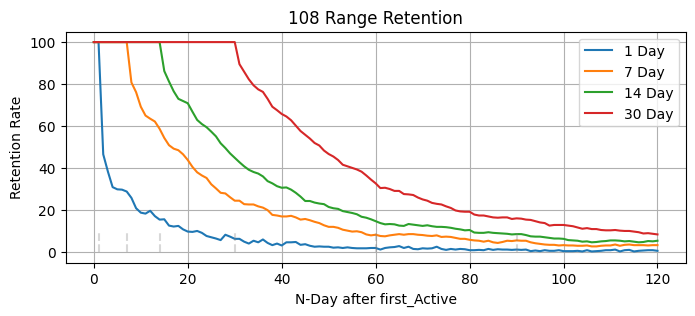

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\2801056022.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  retention_index_df2 = pd.concat([retention_index_df2, result])


[6] : 188 : 192 : 82.51
Not enough user data : 188 lesson.user : 0 < 100
[7] : 74 : 9415 : 81.87
163 : [1887 5574 5728 5874 5976]


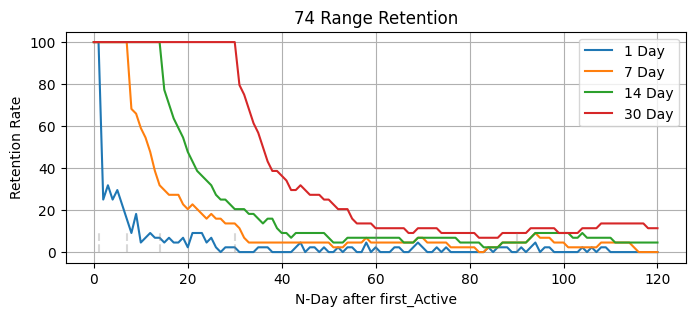

[8] : 36 : 356 : 81.24
Not enough user data : 36 lesson.user : 4 < 100
[9] : 100 : 3854 : 81.09
Not enough user data : 100 lesson.user : 38 < 100
[10] : 76 : 1932 : 80.78
Not enough user data : 76 lesson.user : 64 < 100
[11] : 38 : 1453 : 80.78
Not enough user data : 38 lesson.user : 18 < 100
[12] : 50 : 514 : 80.74
256 : [1451 1582 1641 3606 4107]


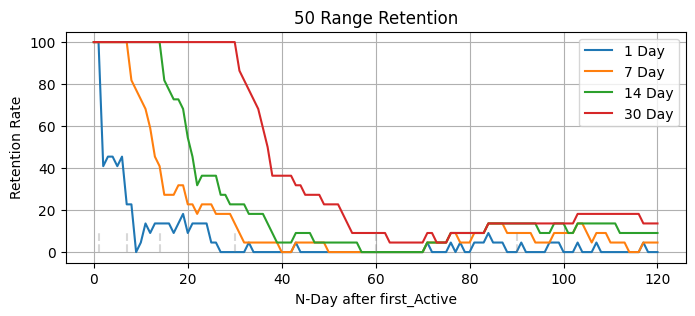

[13] : 116 : 1501 : 80.61
Not enough user data : 116 lesson.user : 9 < 100
[14] : 90 : 1293 : 80.55
Not enough user data : 90 lesson.user : 46 < 100
[15] : 18 : 308 : 80.04
Not enough user data : 18 lesson.user : 15 < 100
[16] : 4 : 907 : 79.81
Not enough user data : 4 lesson.user : 12 < 100
[17] : 200 : 12030 : 79.74
5675 : [ 1 20 21 33 55]


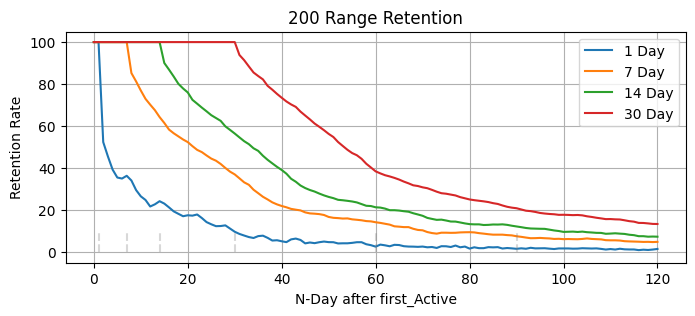

[18] : 110 : 692 : 79.39
Not enough user data : 110 lesson.user : 7 < 100
[19] : 181 : 4748 : 78.73
1578 : [ 25 288 372 471 672]


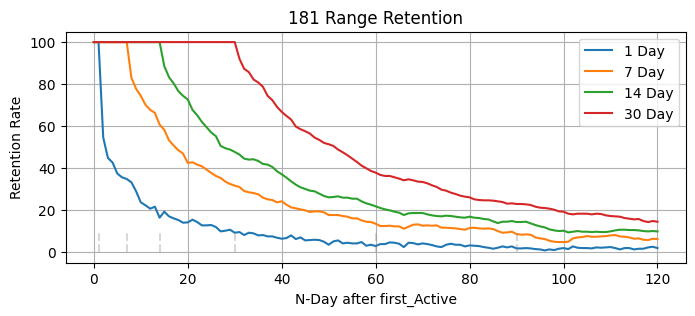

[20] : 22 : 3681 : 77.83
860 : [ 133  570  648  764 1142]


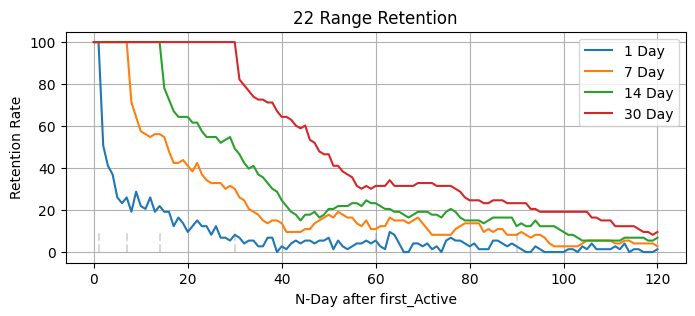

[21] : 61 : 4078 : 76.78
Not enough user data : 61 lesson.user : 96 < 100
[22] : 98 : 1576 : 75.84
Not enough user data : 98 lesson.user : 30 < 100
[23] : 119 : 2633 : 75.67
221 : [ 118  960 2193 3016 3349]


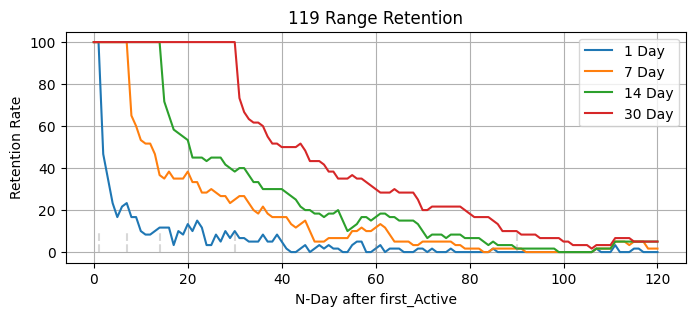

[24] : 150 : 2171 : 75.57
598 : [ 371  589  822  992 1064]


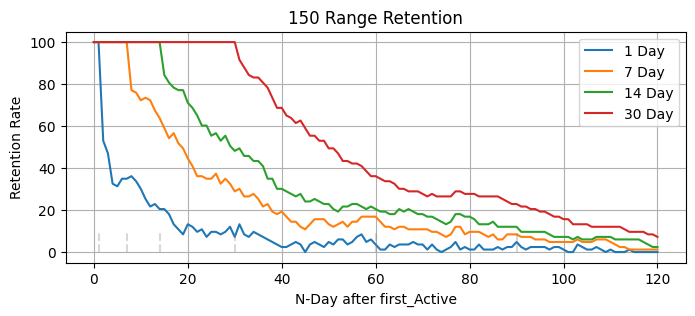

[25] : 129 : 713 : 75.09
Not enough user data : 129 lesson.user : 6 < 100
[26] : 190 : 1937 : 74.86
297 : [ 896  936 1754 2314 2913]


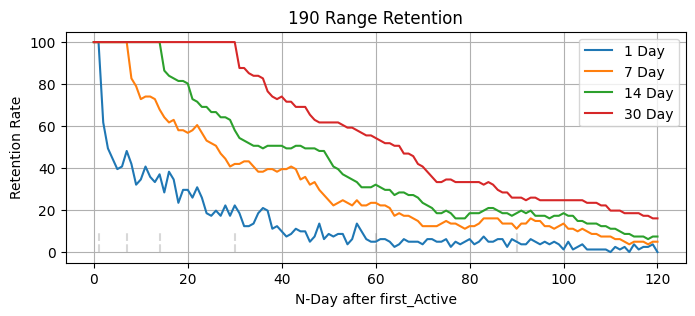

[27] : 89 : 2111 : 74.68
Not enough user data : 89 lesson.user : 23 < 100
[28] : 199 : 1409 : 74.52
Not enough user data : 199 lesson.user : 78 < 100
[29] : 103 : 717 : 74.45
Not enough user data : 103 lesson.user : 14 < 100
[30] : 93 : 8307 : 74.01
1814 : [ 72 502 579 599 623]


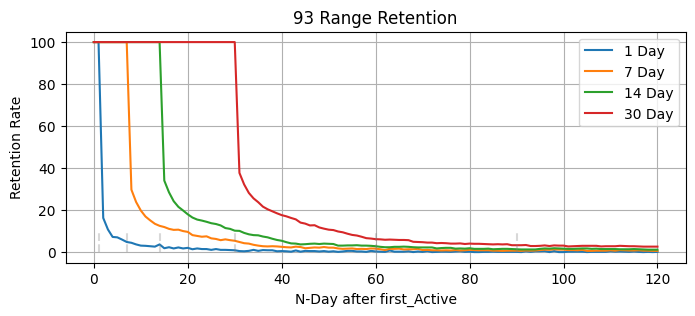

[31] : 139 : 367 : 73.93
Not enough user data : 139 lesson.user : 2 < 100
[32] : 28 : 164 : 73.72
Not enough user data : 28 lesson.user : 4 < 100
[33] : 165 : 658 : 73.13
Not enough user data : 165 lesson.user : 7 < 100
[34] : 167 : 1173 : 73.1
702 : [   6  888 1273 1612 2058]


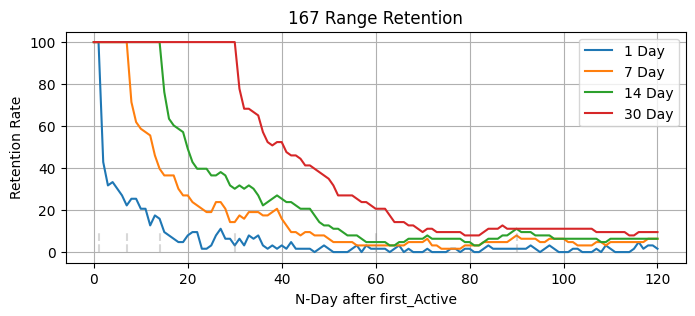

[35] : 147 : 7526 : 72.8
125 : [ 214 4145 5795 5967 8127]


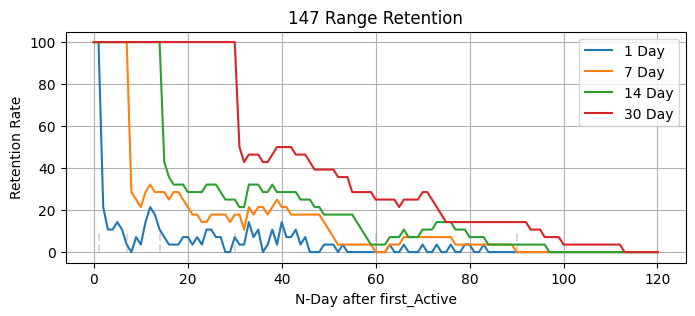

[36] : 92 : 1119 : 72.48
Not enough user data : 92 lesson.user : 21 < 100
[37] : 153 : 1738 : 71.68
340 : [ 409 2347 2499 3300 3697]


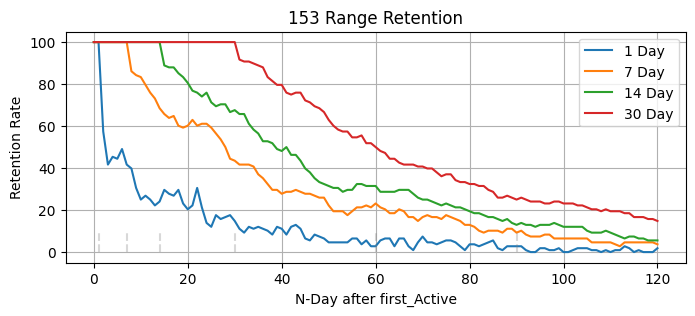

[38] : 66 : 1077 : 70.65
206 : [1698 1833 2454 4346 5216]


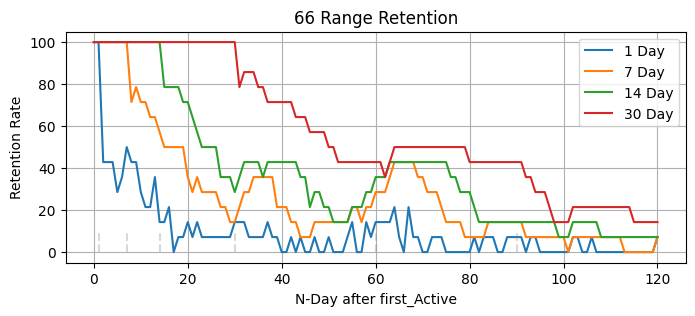

[39] : 83 : 424 : 70.63
Not enough user data : 83 lesson.user : 11 < 100
[40] : 177 : 6130 : 70.6
820 : [ 299  391  754 1087 1620]


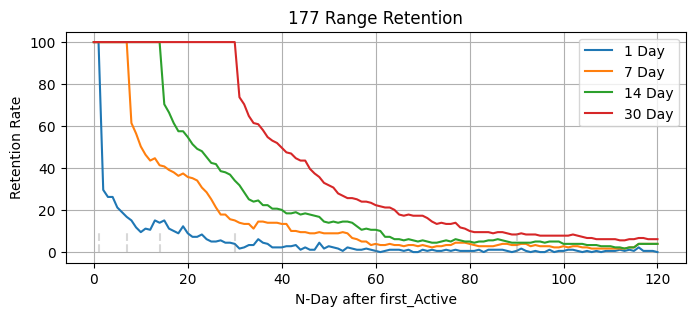

[41] : 65 : 2076 : 69.68
228 : [ 557  685  772 1100 1957]


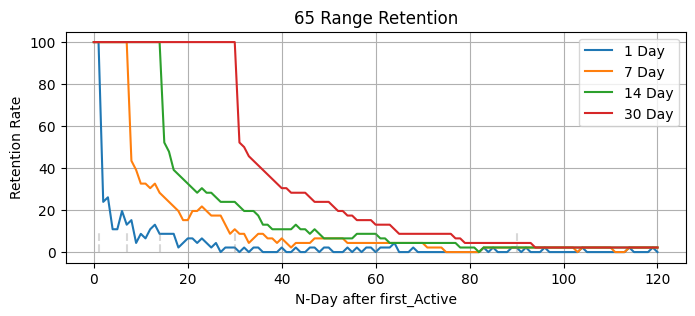

[42] : 171 : 245 : 69.6
Not enough user data : 171 lesson.user : 4 < 100
[43] : 142 : 686 : 69.51
Not enough user data : 142 lesson.user : 90 < 100
[44] : 193 : 1852 : 68.21
229 : [ 605  620 1160 1902 2102]


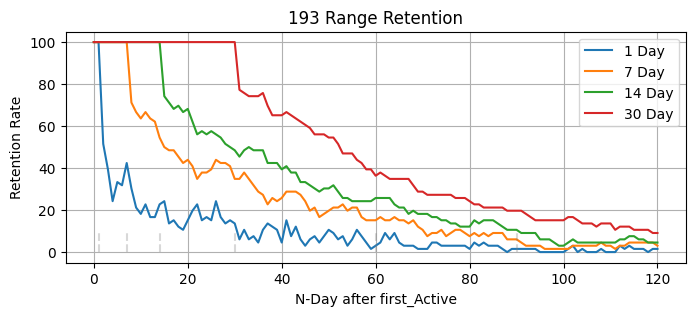

[45] : 106 : 1078 : 67.47
172 : [2813 4607 5060 6210 7105]


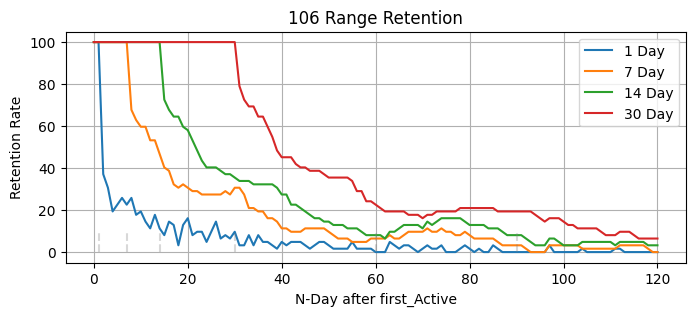

[46] : 144 : 2910 : 67.22
566 : [1380 1443 2326 2409 2569]


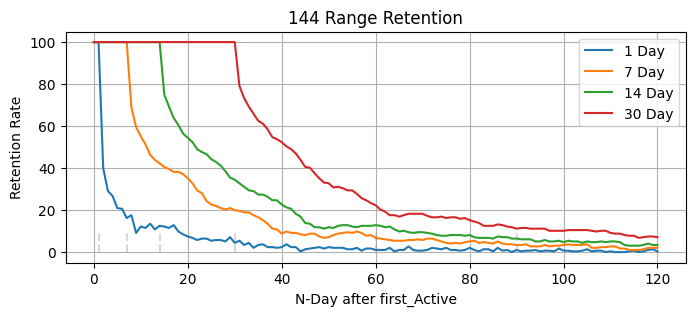

[47] : 94 : 361 : 66.68
Not enough user data : 94 lesson.user : 6 < 100
[48] : 60 : 311 : 66.17
Not enough user data : 60 lesson.user : 8 < 100
[49] : 51 : 1500 : 65.93
218 : [ 173  778 2282 2700 2811]


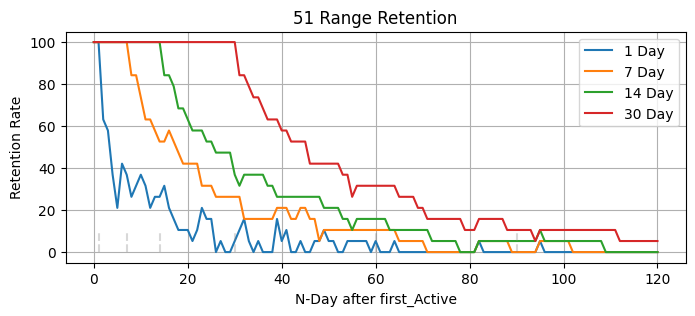

[50] : 189 : 2195 : 65.69
136 : [ 2567  3057  3108  4726 10390]


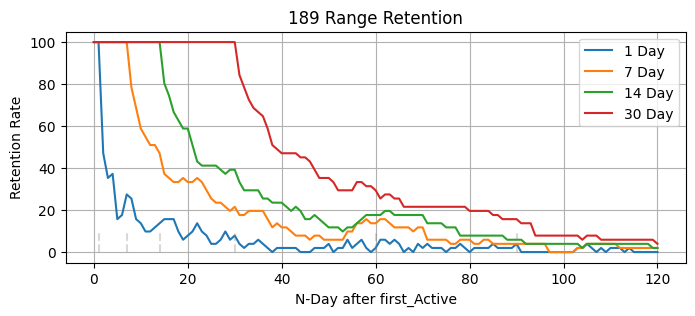

[51] : 27 : 619 : 65.67
Not enough user data : 27 lesson.user : 81 < 100
[52] : 182 : 1608 : 64.8
Not enough user data : 182 lesson.user : 90 < 100
[53] : 131 : 326 : 63.65
Not enough user data : 131 lesson.user : 9 < 100
[54] : 46 : 2420 : 62.65
134 : [ 2067  7870  8249 14830 17992]


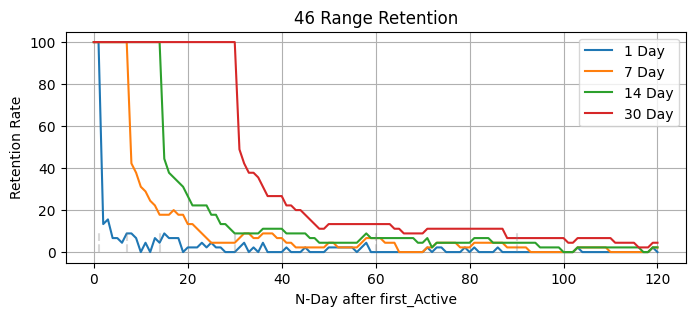

[55] : 95 : 584 : 62.33
Not enough user data : 95 lesson.user : 55 < 100
[56] : 201 : 25865 : 62.04
9918 : [30 32 44 62 89]


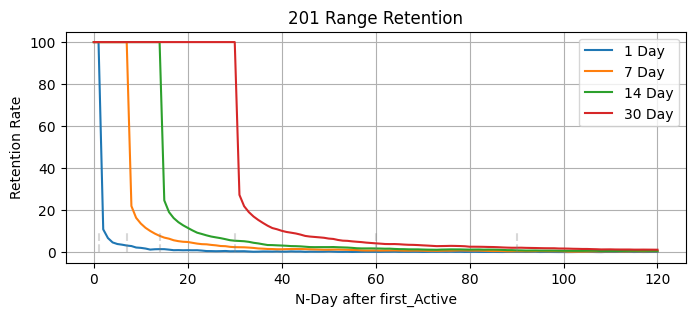

[57] : 99 : 469 : 61.88
Not enough user data : 99 lesson.user : 38 < 100
[58] : 29 : 250 : 61.34
Not enough user data : 29 lesson.user : 8 < 100
[59] : 75 : 2026 : 61.27
101 : [  191  2081  6464  9436 13860]


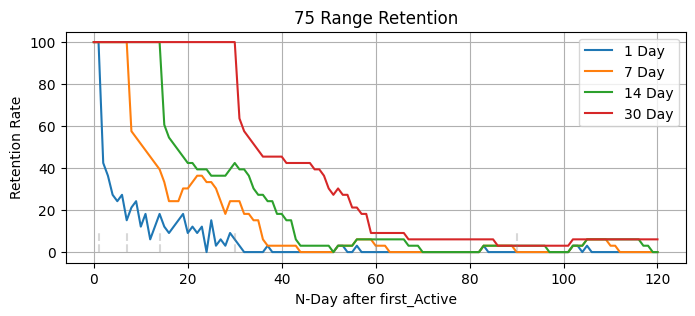

[60] : 109 : 758 : 61.25
Not enough user data : 109 lesson.user : 14 < 100
[61] : 183 : 774 : 61.24
128 : [   78  2937  6652  6874 10050]


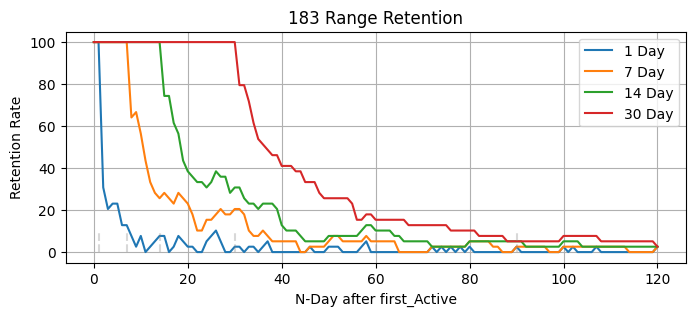

[62] : 141 : 163 : 60.85
Not enough user data : 141 lesson.user : 35 < 100
[63] : 8 : 1313 : 60.82
137 : [   2  322 1576 1961 2440]


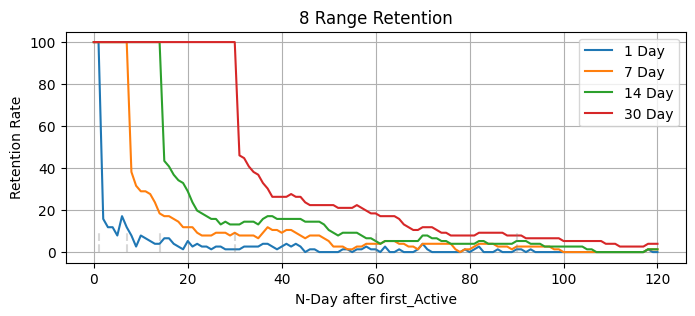

[64] : 47 : 230 : 59.47
Not enough user data : 47 lesson.user : 27 < 100
[65] : 86 : 2992 : 57.17
882 : [ 567  621  733  740 1014]


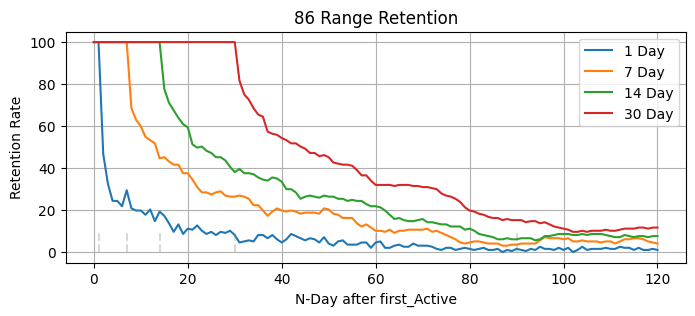

[66] : 140 : 2114 : 56.97
257 : [  83  636 2297 3388 3494]


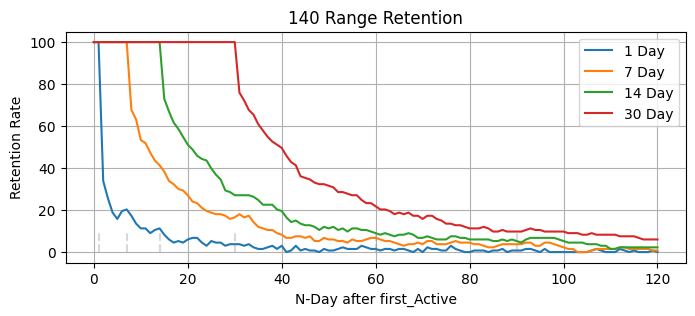

[67] : 11 : 2188 : 56.86
558 : [  81 1153 2203 2250 2678]


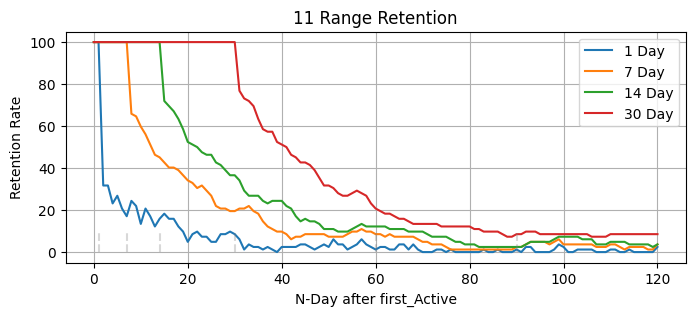

[68] : 32 : 395 : 56.82
Not enough user data : 32 lesson.user : 3 < 100
[69] : 133 : 162 : 56.58
Not enough user data : 133 lesson.user : 11 < 100
[70] : 73 : 476 : 56.55
Not enough user data : 73 lesson.user : 18 < 100
[71] : 81 : 573 : 55.83
Not enough user data : 81 lesson.user : 13 < 100
[72] : 112 : 1283 : 55.58
300 : [ 973 1128 1362 3366 4943]


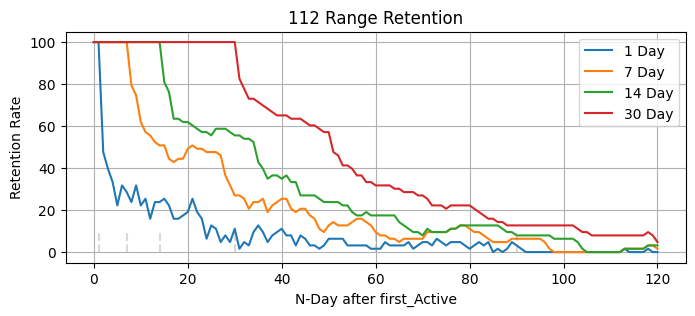

[73] : 166 : 1006 : 55.07
140 : [ 309 1968 2086 2289 2702]


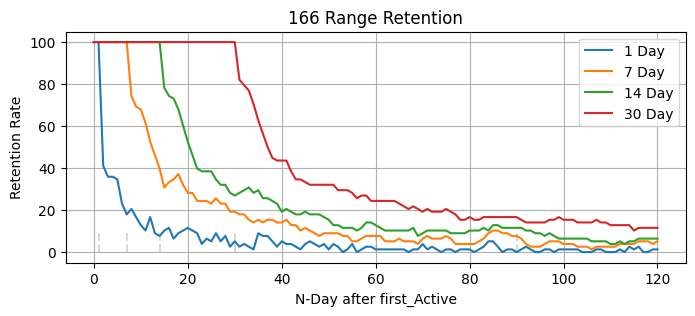

[74] : 135 : 1045 : 55.0
112 : [ 996 2649 5103 5110 7628]


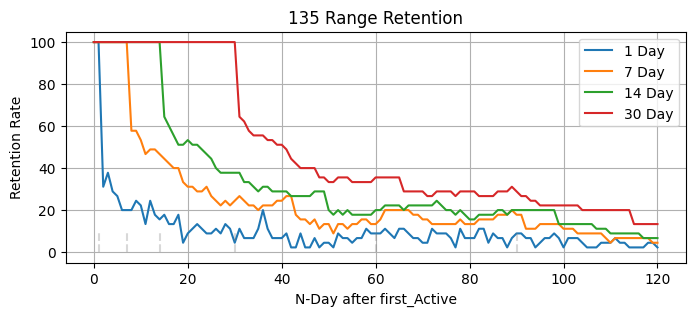

[75] : 168 : 1794 : 54.83
573 : [ 475  543  907  957 1027]


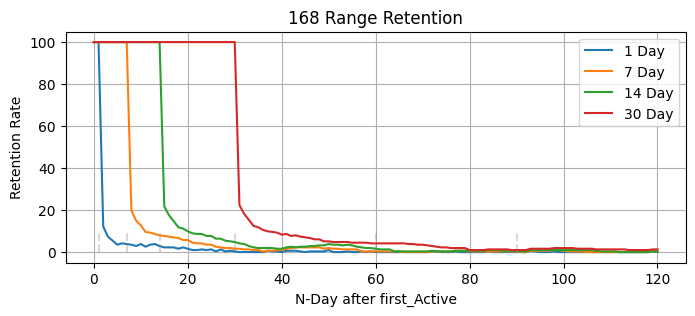

[76] : 57 : 4723 : 54.76
1591 : [321 421 495 774 821]


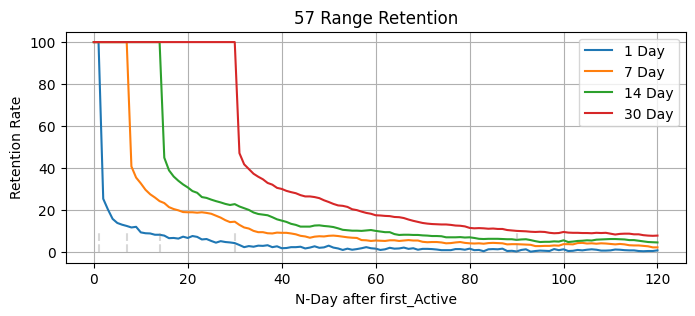

[77] : 35 : 280 : 54.26
Not enough user data : 35 lesson.user : 8 < 100
[78] : 41 : 1492 : 53.82
209 : [ 578 2615 2823 4158 4828]


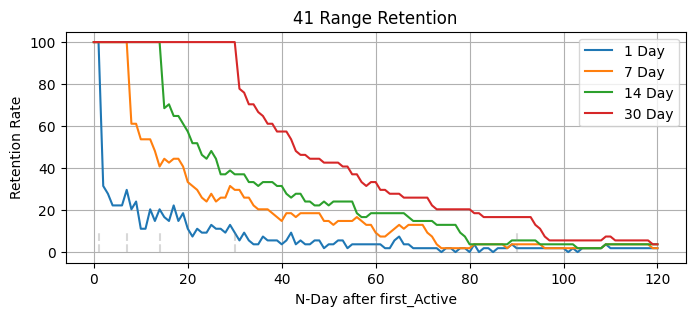

[79] : 136 : 165 : 53.1
Not enough user data : 136 lesson.user : 2 < 100
[80] : 96 : 352 : 52.5
Not enough user data : 96 lesson.user : 24 < 100
[81] : 125 : 229 : 52.39
Not enough user data : 125 lesson.user : 17 < 100
[82] : 13 : 203 : 51.82
Not enough user data : 13 lesson.user : 3 < 100
[83] : 85 : 13701 : 51.02
6656 : [ 15  39  70 127 287]


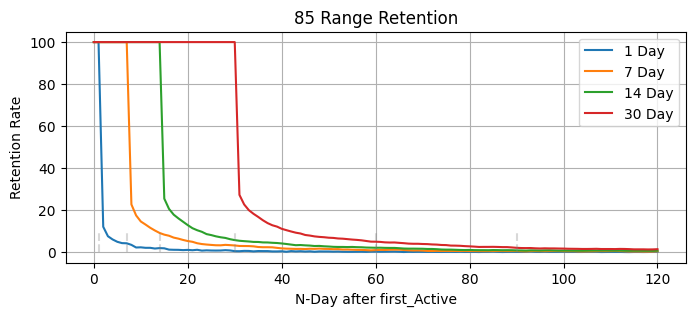

[84] : 88 : 304 : 50.6
Not enough user data : 88 lesson.user : 20 < 100
[85] : 184 : 519 : 50.5
Not enough user data : 184 lesson.user : 59 < 100
[86] : 62 : 900 : 48.63
Not enough user data : 62 lesson.user : 52 < 100
[87] : 30 : 1291 : 48.38
237 : [ 271 1983 3567 3766 5770]


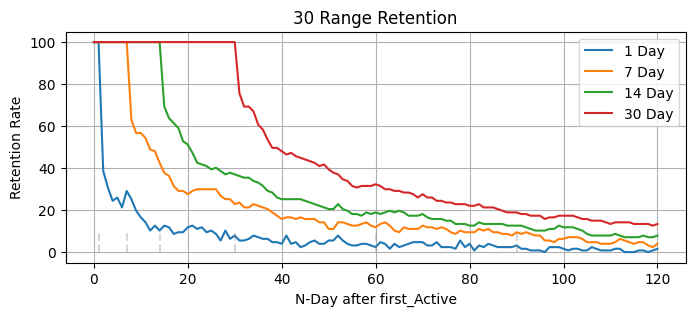

[88] : 159 : 6211 : 47.61
3663 : [ 12 102 104 126 135]


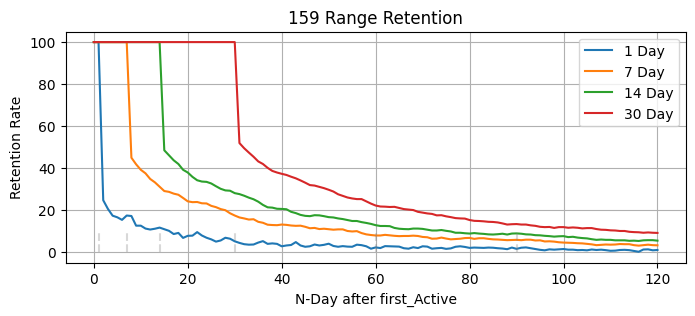

[89] : 170 : 226 : 45.12
Not enough user data : 170 lesson.user : 19 < 100
[90] : 208 : 321 : 43.16
Not enough user data : 208 lesson.user : 10 < 100
[91] : 206 : 362 : 40.22
Not enough user data : 206 lesson.user : 4 < 100


group_name   day1   day2  week1  week2  month1  month2
0         108  46.55  38.29  58.71  40.54   32.73   16.07
1          74  25.00  31.82  31.82  22.73   11.36    9.09
2          50  40.91  45.45  40.91  22.73    9.09   13.64
3         200  52.37  45.52  64.29  50.43   38.44   20.88
4         181  54.53  44.83  60.73  42.77   37.84   22.89
5          22  50.68  41.10  56.16  38.36   31.51   23.29
6         119  46.67  35.00  36.67  33.33   30.00   10.00
7         150  53.01  46.99  63.86  40.96   36.14   22.89
8         190  61.73  49.38  67.90  58.02   54.32   25.93
9          93  16.25  10.77  12.50   8.08    6.15    3.27
10        167  42.86  31.75  39.68  23.81   20.63   11.11
11        147  21.43  10.71  28.57  17.86   25.00   14.29
12        153  57.41  41.67  68.52  62.96   50.00   25.00
13         66  42.86  42.86  57.14  28.57   42.86   42.86
14        177  29.61  26.26  41.34  35.20   22.35    8.38
15         65  23.91  26.09  28.26  19.57   13.04    4.35
16        193  51.52  39.39  54.55  40.91   36.36   19.70
17        106  37.10  30.65  46.77  29.03   22.58   19.35
18        144  39.86  29.05  42.23  32.77   22.30   11.15
19         51  63.16  57.89  52.63  42.11   31.58   10.53
20        189  47.06  35.29  47.06  33.33   29.41   15.69
21         46  13.33  15.56  17.78  13.33   13.33    6.67
22        201  10.81   6.68   7.73   4.41    4.17    2.06
23         75  42.42  36.36  39.39  33.33    9.09    3.03
24        183  30.77  20.51  25.64  17.95   15.38    5.13
25          8  15.79  11.84  18.42  11.84   18.42    7.89
26         86  46.70  32.49  44.67  34.52   31.98   15.23
27        140  33.83  25.56  41.35  24.06   21.80    9.77
28         11  31.71  31.71  45.12  32.93   20.73    8.54
29        112  47.62  39.68  50.79  50.79   31.75   12.70
30        166  41.03  35.90  39.74  28.21   24.36   16.67
31        135  31.11  37.78  46.67  31.11   35.56   28.89
32        168  12.14   7.35   7.99   4.47    4.15    0.96
33         57  25.38  20.29  24.26  18.96   17.53   10.09
34         41  31.48  27.78  40.74  31.48   33.33   16.67
35         85  12.05   7.55   9.11   4.89    4.94    2.03
36         30  38.58  30.71  42.52  29.13   32.28   18.90
37        159  24.69  20.55  31.13  23.77   22.16   13.34

In [134]:
retention_index_df2 = pd.DataFrame(columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

limit_min = 100
# why 3000 > ? : Sign-up Event Count (30일 단위 합산) =~= 3000 
# why 1700 > ? : all user cnt / 100 =~= 1700 
# why 100 > ? : for percentage of user

target_df = con_df[con_df['con_nu'] > limit_min].sort_values('con_les_nu_rate', ascending=False)

target_list = zip(target_df['content.id'], target_df['con_nu'], target_df['con_les_nu_rate'])
# set retention_range
retention_range = 120

for index, target in enumerate(target_list):
    # unpacking
    target_content_id = int(target[0])
    con_nu = int(target[1])
    con_les_nu_rate = target[2]
    print(f"[{index}] : {target_content_id} : {con_nu} : {con_les_nu_rate}")

    # get max_timeline
    max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')

    # get index_mask : user filtering
    index_mask = target_user[target_user['content.id'] == target_content_id]['user_id'].unique()
    
    # update con_df
    con_df.loc[con_df['content.id'] == target_content_id, 'num_of_effected_users'] = len(index_mask)
    
    # except under limit_min
    if len(index_mask) < limit_min:
        print(f"Not enough user data : {target_content_id} lesson.user : {len(index_mask)} < {limit_min}")
        continue
    
    print(f'{len(index_mask)} : {index_mask[:5]}')
        
    # filtering
    user = base_user[base_user['sign_up_time'] < max_timeline]
    user = user[user['user_id'].isin(index_mask)]

    target_name = target_content_id
    
    result = get_retention(base_df, user, target_name, retention_range, 'first_Active')

    retention_index_df2 = pd.concat([retention_index_df2, result])
    
retention_index_df2.reset_index(drop=True, inplace=True)
retention_index_df2   

In [121]:
result = retention_index_df2.copy()
result.rename(columns={'group_name' : 'content_id'}, inplace=True)
result['day1/day2'] = round(result['day2'] / result['day1'] * 100, 2)
result['week1/week1'] = round(result['week2'] / result['week1'] * 100, 2)
result['month1/month2'] = round(result['month2'] / result['month1'] * 100, 2)

temp = con_df.rename(columns={'content.id' : 'content_id'})

result = pd.merge(result, temp, on='content_id', how='left')
result

content_id   day1   day2  week1  week2  month1  month2  day1/day2  \
0         108  46.55  38.29  58.71  40.54   32.73   16.07      82.26   
1          74  25.00  31.82  31.82  22.73   11.36    9.09     127.28   
2          50  40.91  45.45  40.91  22.73    9.09   13.64     111.10   
3         200  52.37  45.52  64.29  50.43   38.44   20.88      86.92   
4         181  54.53  44.83  60.73  42.77   37.84   22.89      82.21   
5          22  50.68  41.10  56.16  38.36   31.51   23.29      81.10   
6         119  46.67  35.00  36.67  33.33   30.00   10.00      74.99   
7         150  53.01  46.99  63.86  40.96   36.14   22.89      88.64   
8         190  61.73  49.38  67.90  58.02   54.32   25.93      79.99   
9          93  16.25  10.77  12.50   8.08    6.15    3.27      66.28   
10        167  42.86  31.75  39.68  23.81   20.63   11.11      74.08   
11        147  21.43  10.71  28.57  17.86   25.00   14.29      49.98   
12        153  57.41  41.67  68.52  62.96   50.00   25.00      72.58   
13         66  42.86  42.86  57.14  28.57   42.86   42.86     100.00   
14        177  29.61  26.26  41.34  35.20   22.35    8.38      88.69   
15         65  23.91  26.09  28.26  19.57   13.04    4.35     109.12   
16        193  51.52  39.39  54.55  40.91   36.36   19.70      76.46   
17        106  37.10  30.65  46.77  29.03   22.58   19.35      82.61   
18        144  39.86  29.05  42.23  32.77   22.30   11.15      72.88   
19         51  63.16  57.89  52.63  42.11   31.58   10.53      91.66   
20        189  47.06  35.29  47.06  33.33   29.41   15.69      74.99   
21         46  13.33  15.56  17.78  13.33   13.33    6.67     116.73   
22        201  10.81   6.68   7.73   4.41    4.17    2.06      61.79   
23         75  42.42  36.36  39.39  33.33    9.09    3.03      85.71   
24        183  30.77  20.51  25.64  17.95   15.38    5.13      66.66   
25          8  15.79  11.84  18.42  11.84   18.42    7.89      74.98   
26         86  46.70  32.49  44.67  34.52   31.98   15.23      69.57   
27        140  33.83  25.56  41.35  24.06   21.80    9.77      75.55   
28         11  31.71  31.71  45.12  32.93   20.73    8.54     100.00   
29        112  47.62  39.68  50.79  50.79   31.75   12.70      83.33   
30        166  41.03  35.90  39.74  28.21   24.36   16.67      87.50   
31        135  31.11  37.78  46.67  31.11   35.56   28.89     121.44   
32        168  12.14   7.35   7.99   4.47    4.15    0.96      60.54   
33         57  25.38  20.29  24.26  18.96   17.53   10.09      79.94   
34         41  31.48  27.78  40.74  31.48   33.33   16.67      88.25   
35         85  12.05   7.55   9.11   4.89    4.94    2.03      62.66   
36         30  38.58  30.71  42.52  29.13   32.28   18.90      79.60   
37        159  24.69  20.55  31.13  23.77   22.16   13.34      83.23   

    week1/week1  month1/month2  con_nu  con_les_nu_mean  con_les_nu_rate  \
0         69.05          49.10    5036             4189            83.19   
1         71.43          80.02    9415             7707            81.87   
2         55.56         150.06     514              415            80.74   
3         78.44          54.32   12030             9592            79.74   
4         70.43          60.49    4748             3738            78.73   
5         68.30          73.91    3681             2864            77.83   
6         90.89          33.33    2633             1992            75.67   
7         64.14          63.34    2171             1640            75.57   
8         85.45          47.74    1937             1450            74.86   
9         64.64          53.17    8307             6148            74.01   
10        60.01          53.85    1173              857            73.10   
11        62.51          57.16    7526             5479            72.80   
12        91.89          50.00    1738             1245            71.68   
13        50.00         100.00    1077              760            70.65   
14        85.15          37.49    6130             432

day1  day2  week1  week2  month1  \
day1                                      1.00  0.93   0.92   0.90    0.79   
day2                                      0.93  1.00   0.90   0.84    0.71   
week1                                     0.92  0.90   1.00   0.93    0.87   
week2                                     0.90  0.84   0.93   1.00    0.85   
month1                                    0.79  0.71   0.87   0.85    1.00   
month2                                    0.60  0.64   0.77   0.60    0.84   
day1/day2                                 0.06  0.40   0.21   0.14    0.04   
week1/week1                               0.44  0.36   0.37   0.65    0.40   
month1/month2                             0.12  0.31   0.23   0.01    0.07   
number of user in content                -0.41 -0.43  -0.39  -0.34   -0.35   
mean of user in lesson of content        -0.34 -0.35  -0.31  -0.26   -0.29   
mean of lesson completed rate of content  0.40  0.43   0.42   0.33    0.23   
number of lesson in content               0.48  0.49   0.53   0.51    0.54   
number of effected users                 -0.32 -0.35  -0.32  -0.28   -0.28   
difficulty of content                     0.46  0.51   0.48   0.41    0.49   

                                          month2  day1/day2  week1/week1  \
day1                                        0.60       0.06         0.44   
day2                                        0.64       0.40         0.36   
week1                                       0.77       0.21         0.37   
week2                                       0.60       0.14         0.65   
month1                                      0.84       0.04         0.40   
month2                                      1.00       0.23        -0.00   
day1/day2                                   0.23       1.00         0.06   
week1/week1                                -0.00       0.06         1.00   
month1/month2                               0.50       0.44        -0.40   
number of user in content                  -0.31      -0.25        -0.21   
mean of user in lesson of content          -0.26      -0.20        -0.17   
mean of lesson completed rate of content    0.25       0.16        -0.00   
number of lesson in content                 0.51       0.19         0.32   
number of effected users                   -0.24      -0.30        -0.23   
difficulty of content                       0.46       0.32         0.23   

                                          month1/month2  \
day1                                               0.12   
day2                                               0.31   
week1                                              0.23   
week2                                              0.01   
month1                                             0.07   
month2                                             0.50   
day1/day2                                          0.44   
week1/week1                                       -0.40   
month1/month2                                      1.00   
number of user in content                         -0.09   
mean of user in lesson of content                 -0.06   
mean of lesson completed rate of content           0.31   
number of lesson in content                        0.22   
number of effected users                          -0.09   
difficulty of content                              0.13   

                                          number of user in content  \
day1                                                          -0.41   
day2                                                          -0.43   
week1                                                         -0.39   
week2                                                         -0.34   
month1                                                        -0.35   
month2                                                        -0.31   
day1/day2                                                     -0.25   
week1/week1                                                   -

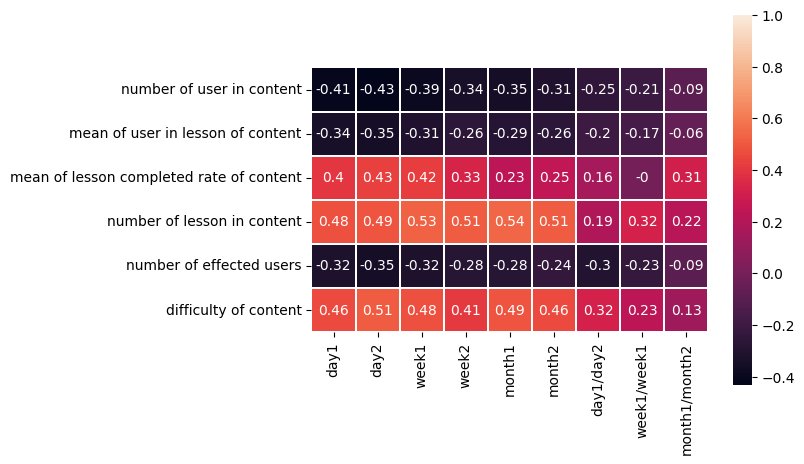

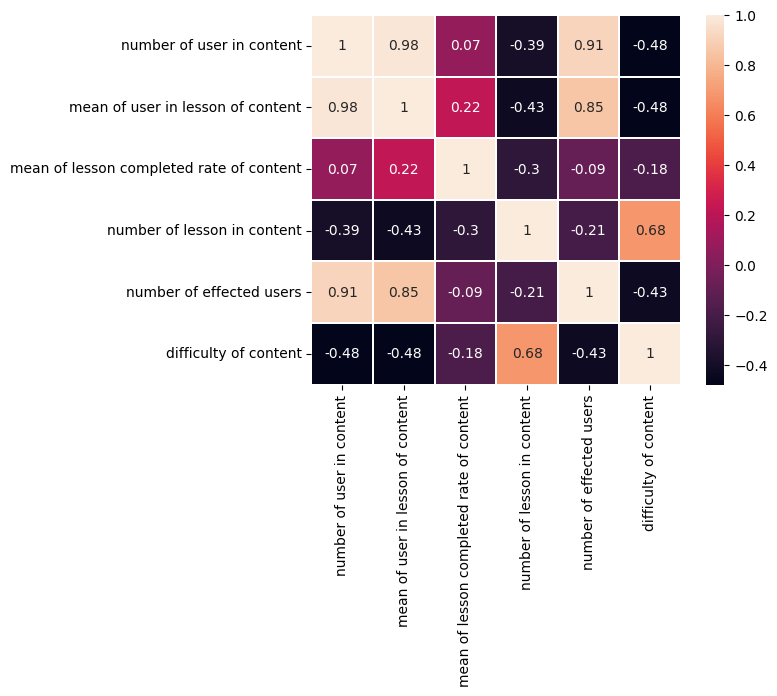

In [132]:
# correlation
import scipy.stats as stats

corr_matrix = result\
        .rename(columns = {'con_nu' : 'number of user in content',
                           'con_les_nu_mean' : 'mean of user in lesson of content',
                           'con_les_nu_rate' : 'mean of lesson completed rate of content',
                           'con_les_nu_cnt' : 'number of lesson in content',
                           'num_of_effected_users' : 'number of effected users',
                           'content.difficulty' : 'difficulty of content'
                           })\
        .drop(columns=['content_id']).corr().round(2)
display(corr_matrix)

sns.heatmap(corr_matrix.iloc[9:, :9], linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()
sns.heatmap(corr_matrix.iloc[9:, 9:], linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()
# scatter plot

### activate to sign up date

In [174]:
ONLY_NEW_USER = False
user_id_in_df = user_indexs[user_indexs['event_type'] == 3]['user_id'].unique()

# set the target df
if ONLY_NEW_USER:
    dfs = [
        com_df_22.loc[(com_df_22['event_type'] == 14) & com_df_22['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']],
        com_df_23.loc[(com_df_23['event_type'] == 14) & com_df_23['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']]
    ]
else:
    dfs = [
        com_df_22.loc[com_df_22['event_type'] == 14, ['user_id', 'client_event_time']],
        com_df_23.loc[com_df_23['event_type'] == 14, ['user_id', 'client_event_time']]
    ]

# set time list
timelists = [
    pd.date_range('2022-01-01', '2022-12-31', freq='D').floor("D"),
    pd.date_range('2023-01-01', '2023-12-31', freq='D').floor("D")
]

# set result, temp
results = [[], []]
temps = [[], []]

user_df

# get results
for i in range(2):
    results[i] = dfs[i].groupby(dfs[i]['client_event_time'].dt.strftime("%m-%d"))['user_id'].unique()
    # temps[i] = pd.DataFrame(["01-01", results[i].iloc[0]])
    # temps[i] = temps[i].T
    # temps[i].columns = ['date', 'user_id_unique']

data_sets = {}

for year, dfs in enumerate(results):
    year = 2022 + year
    # group by month
    dfs = dfs.groupby(dfs.index.str[:2]).apply(list)
    
    for month, month_user_id in enumerate(dfs):
        # set
        month = month + 1
        label = f'{year}-{month}'
        data_sets[label] = []

        for day, day_user_id in enumerate(month_user_id):
            date = pd.to_datetime(dt.strptime(f'{label}-{day + 1}', '%Y-%m-%d'))
            
            for user_id in day_user_id:
                sign_up = user_df[user_df['user_id'] == user_id]['sign_up_time'].values[0]
                value = (date - sign_up).days
                
                if value < 0:
                    value = 0
                
                data_sets[label].append(value)
        
        print(data_sets[label])
        # data_sets[label] = np.array(data_sets[label])

# # display
# results[0].plot(figsize=(8, 3), label='2022', title='Daily lesson complete Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
# results[1].plot(figsize=(8, 3), label='2023', xlabel='Date', grid=True)
# plt.legend()
# plt.show()

# # set result_list
# result_list = [[], []]

# for i in range(2):
#     result_list[i] = [ results[i].copy() ]
    
# # rolling count
# for rolling_offset in [7, 14, 30]:
#     # reset rolling
#     results = [
#         pd.DataFrame(temps[0].copy(), columns=['date', 'user_id_unique']),
#         pd.DataFrame(temps[1].copy(), columns=['date', 'user_id_unique'])
#     ]
    
#     for j in range(2):
#         for i in range(1, 365):
#             # set mindate
#             if i <= rolling_offset - 1:
#                 min_data = timelists[j][0]
#             else:
#                 min_data = timelists[j][i + 1 - rolling_offset]
            
#             # get rolling result
#             rolling_result = dfs[j]\
#                 .loc[((dfs[j]['client_event_time'] >= pd.Timestamp(min_data))\
#                     & (dfs[j]['client_event_time'] <= pd.Timestamp(timelists[j][i]))), 'user_id']\
#                         .nunique()

#             # set temp result
#             temp = pd.DataFrame([timelists[j][i].strftime("%m-%d"), rolling_result])
#             temp = temp.T
#             temp.columns = ['date', 'user_id_unique']
                
#             # concat            
#             results[j] = pd.concat([results[j], temp])

#         # set index
#         results[j].set_index('date', inplace=True)
        
#         # append result_list
#         result_list[j].append(results[j].copy())

#     # display
#     results[0]['user_id_unique'].plot(figsize=(8, 3), label = '2022', title=f'Range retention lesson complete Event User nunique({rolling_offset} Day Range)', xlabel='Date', ylabel='# of Nunique', grid=True)
#     results[1]['user_id_unique'].plot(figsize=(8, 3), label = '2023', xlabel='Date', grid=True)
    
#     plt.legend()
#     plt.show()

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

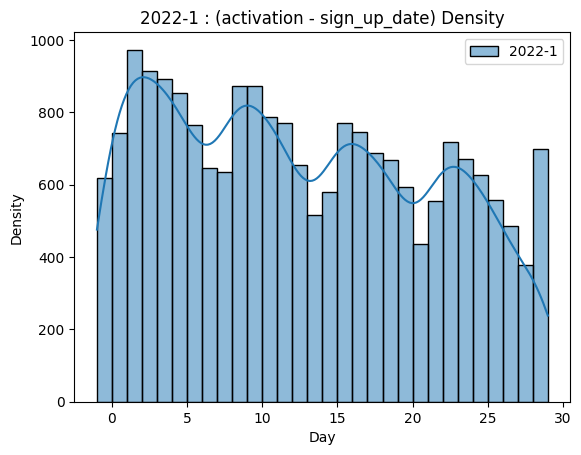

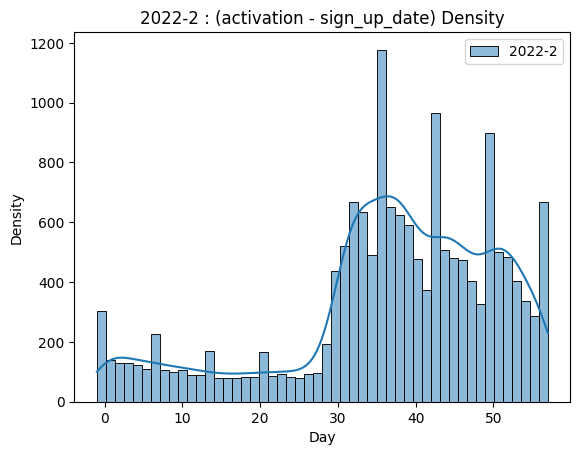

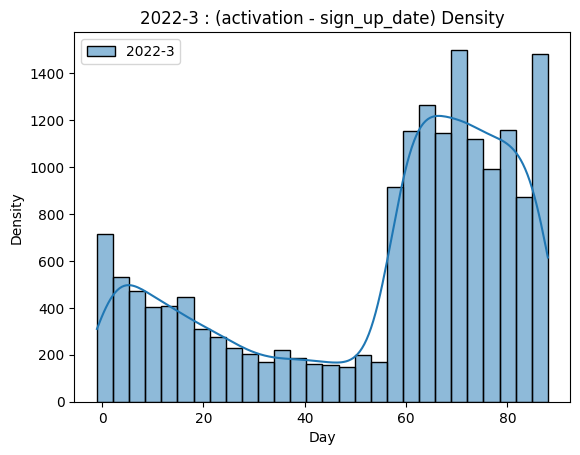

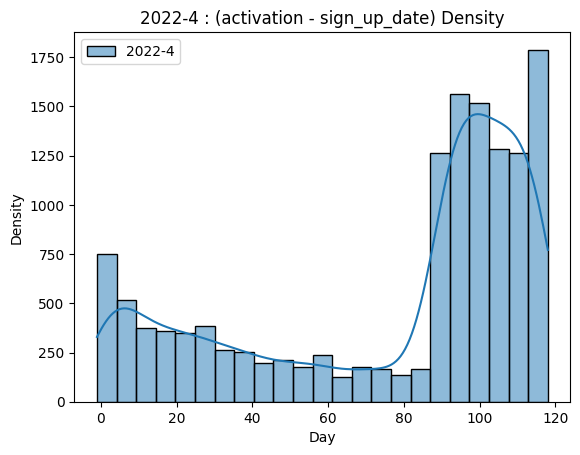

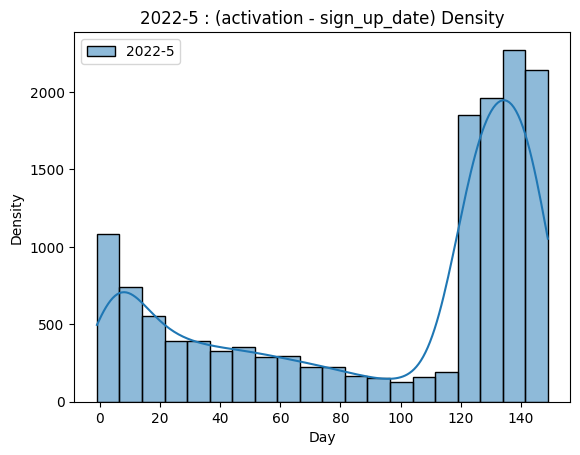

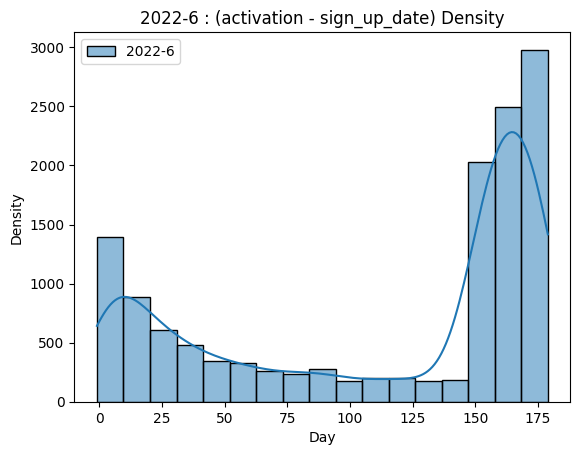

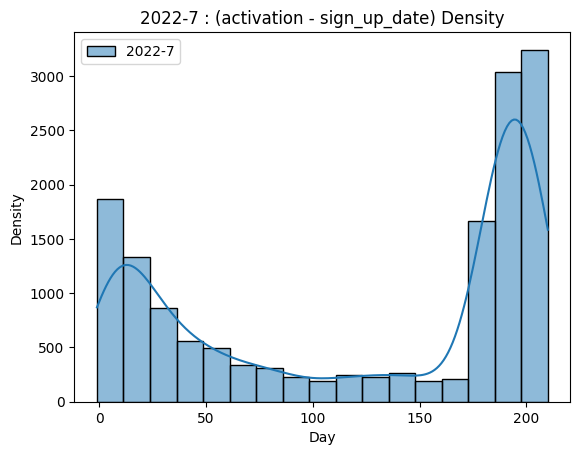

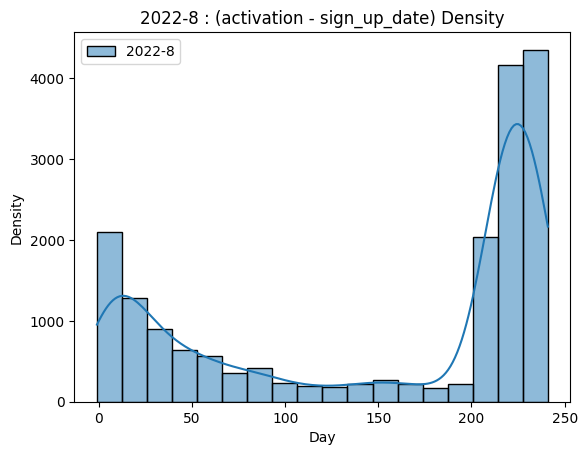

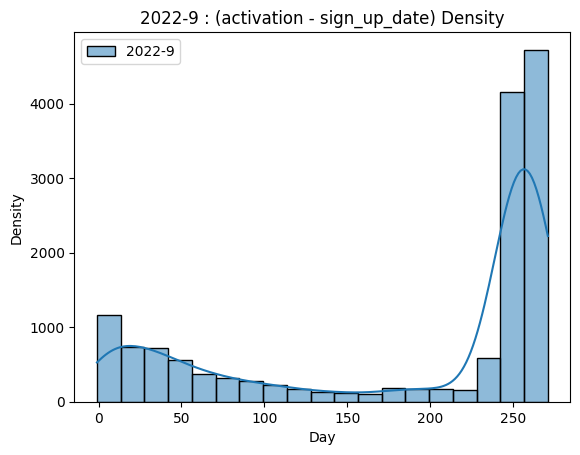

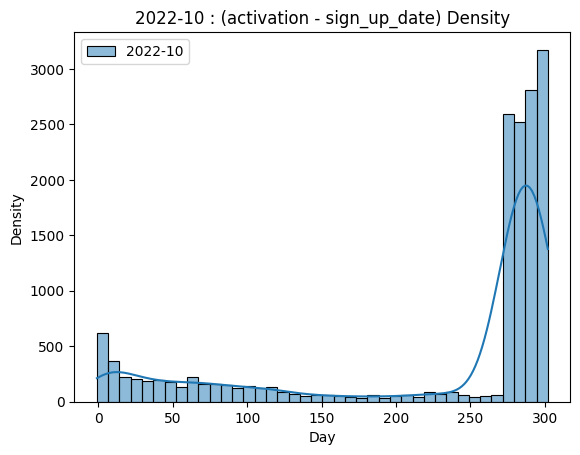

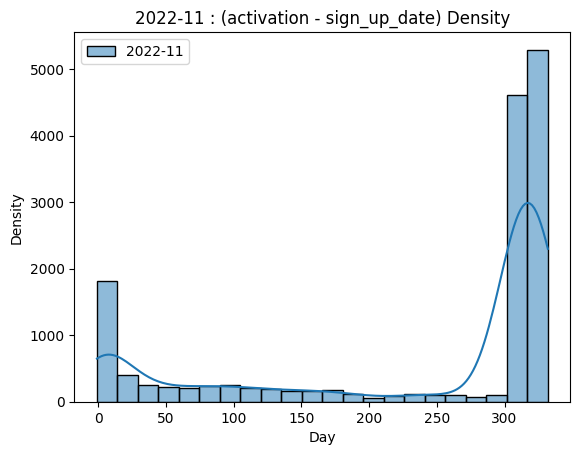

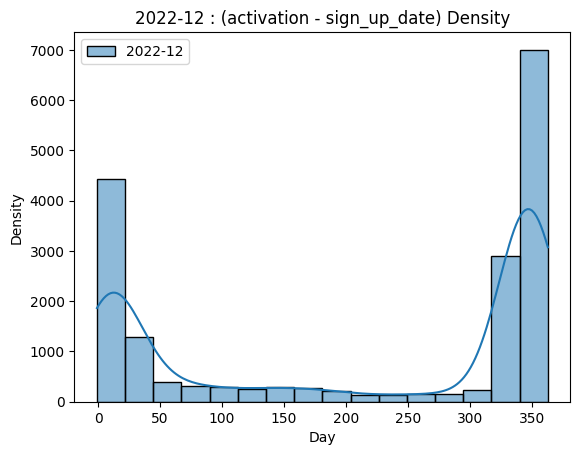

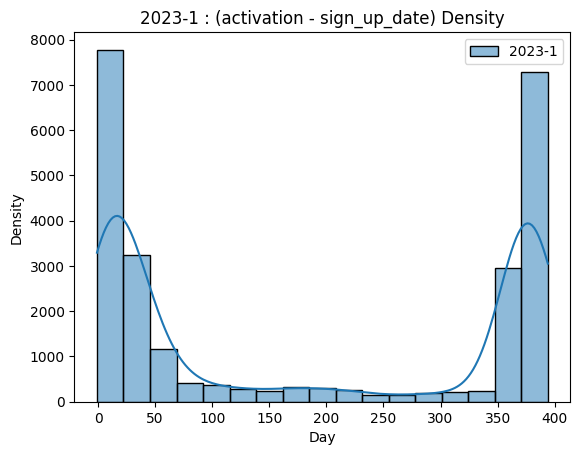

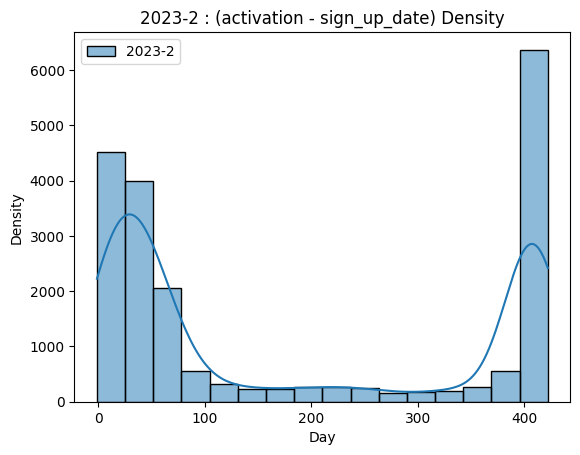

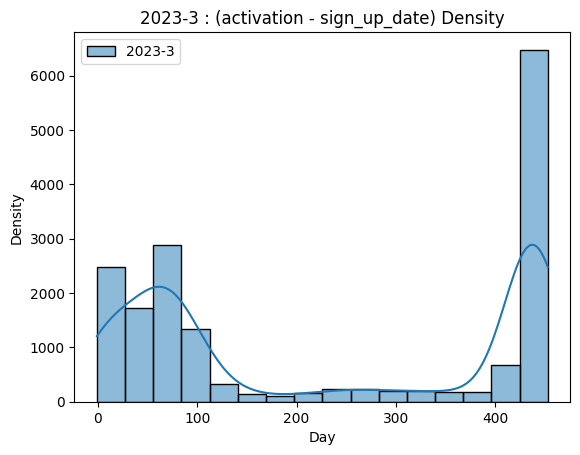

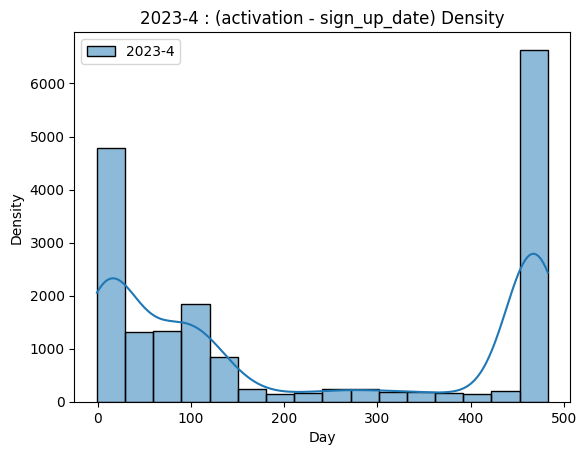

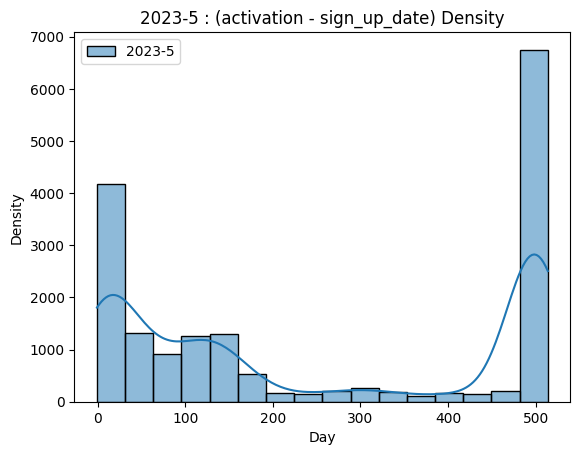

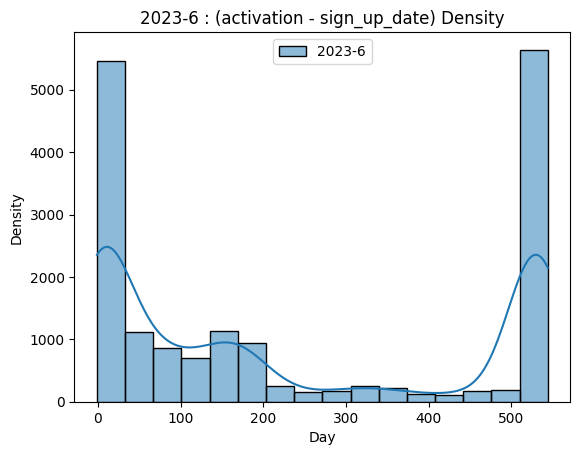

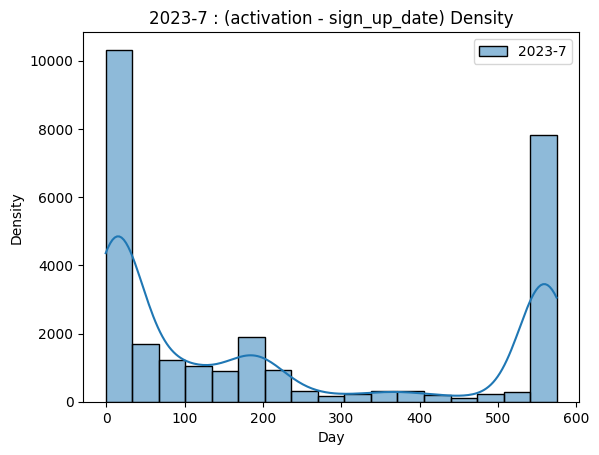

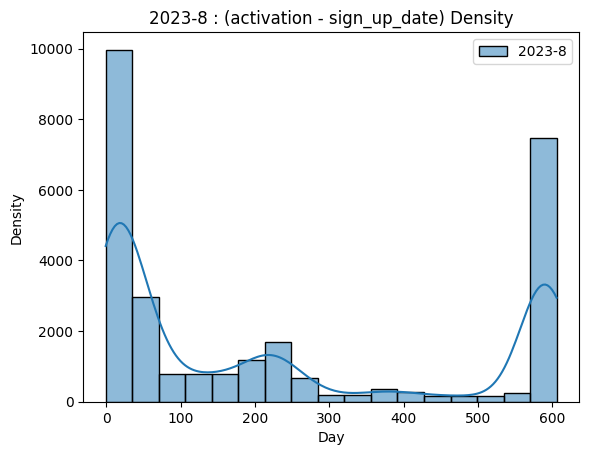

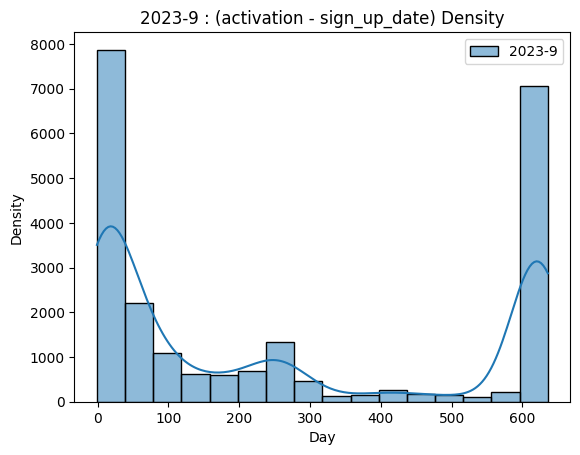

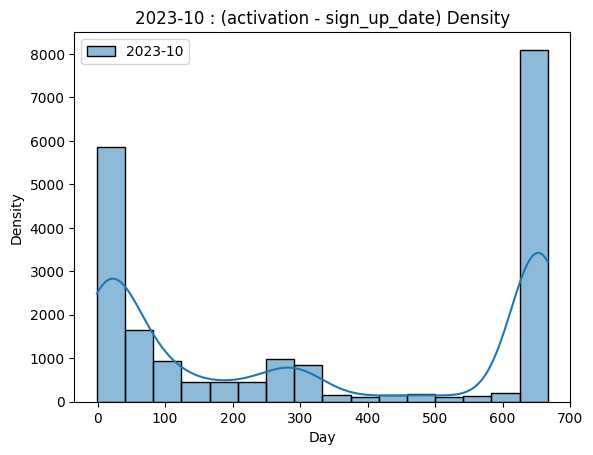

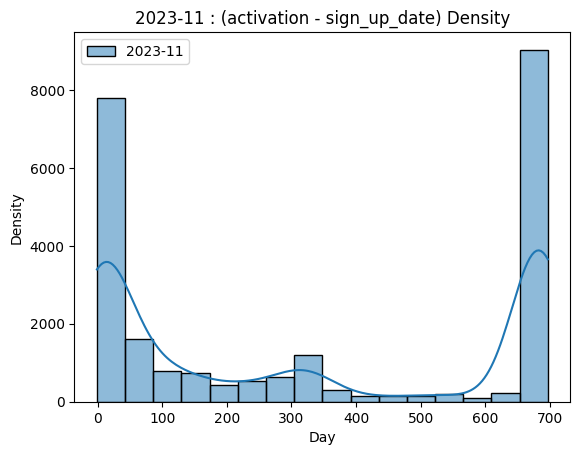

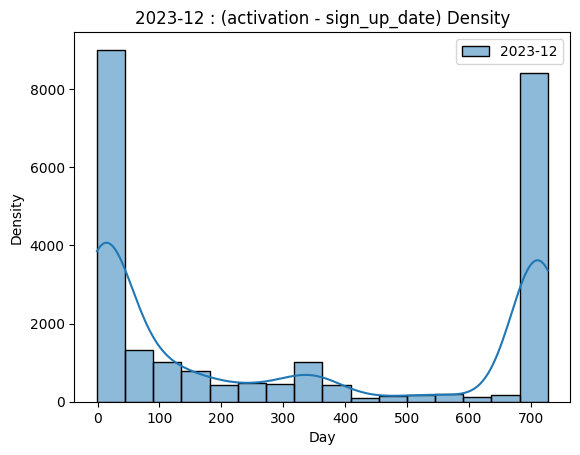

In [ ]:
for year in [2022, 2023]:
    for month in range(1, 13):
        label = f'{year}-{month}'
        
        ax = sns.histplot(data=data_sets[label], label=label
                        , kde=True, alpha=0.5)
        ax = sns.kdeplot()

        ax.set_xlabel('Day')
        ax.set_ylabel('Density')
        ax.set_title(f'{year}-{month} : (activation - sign-up date) Density')
        
        plt.legend()
        plt.show()